# Исследование объявлений о продаже квартир

**Цели исследования:** 

1. выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости
2. определить рыночную стоимость объектов недвижимости, установить параметры и построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность

**Описание данных:**

для проведения анализа представлены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет (*файл /datasets/real_estate_data.csv*). По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. Ниже приведен перечень представленных даных: 

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

**План работы:**

1. открыть файл с данными и изучить общую информацию
2. выполнить предобработку данных
3. добавить в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)
4. провести исследовательский анализ данных
5. сформулировать общий вывод




### Откройте файл с данными и изучите общую информацию. 

In [1]:
# импортируем нужные библиотеки
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.filterwarnings('ignore')
# загружаем данные из файла в датафрейм
# и устанавливаем разделитель колонок, иначе все данные отображаются в одном столбце
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
data.info() # выводим основную информацию о датафрейме с помощью метода info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Как мы видим, в нашей таблице 22 столбца, из значения 2 из которых относятся к логическому типу, 14 - к вещественному,
3 - к целочисленному и 3 - текст.

In [2]:
# приведем название столбцов cityCenters_nearest, parks_around3000, ponds_around3000 к змеиному регистру
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})

In [3]:
data.head(20) # выводим первые 20 строчек датафрейма data на экран


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Анализируя полученные данные, видим, что пропуски имеются по крайней мере в 11 столбцах из 22:
- ceiling_height
- living_area
- is_apartment
- balcony
- airports_nearest
- cityCenters_nearest
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest
- days_exposition

С ними мы будем работать на этапе "Предобработка данных"

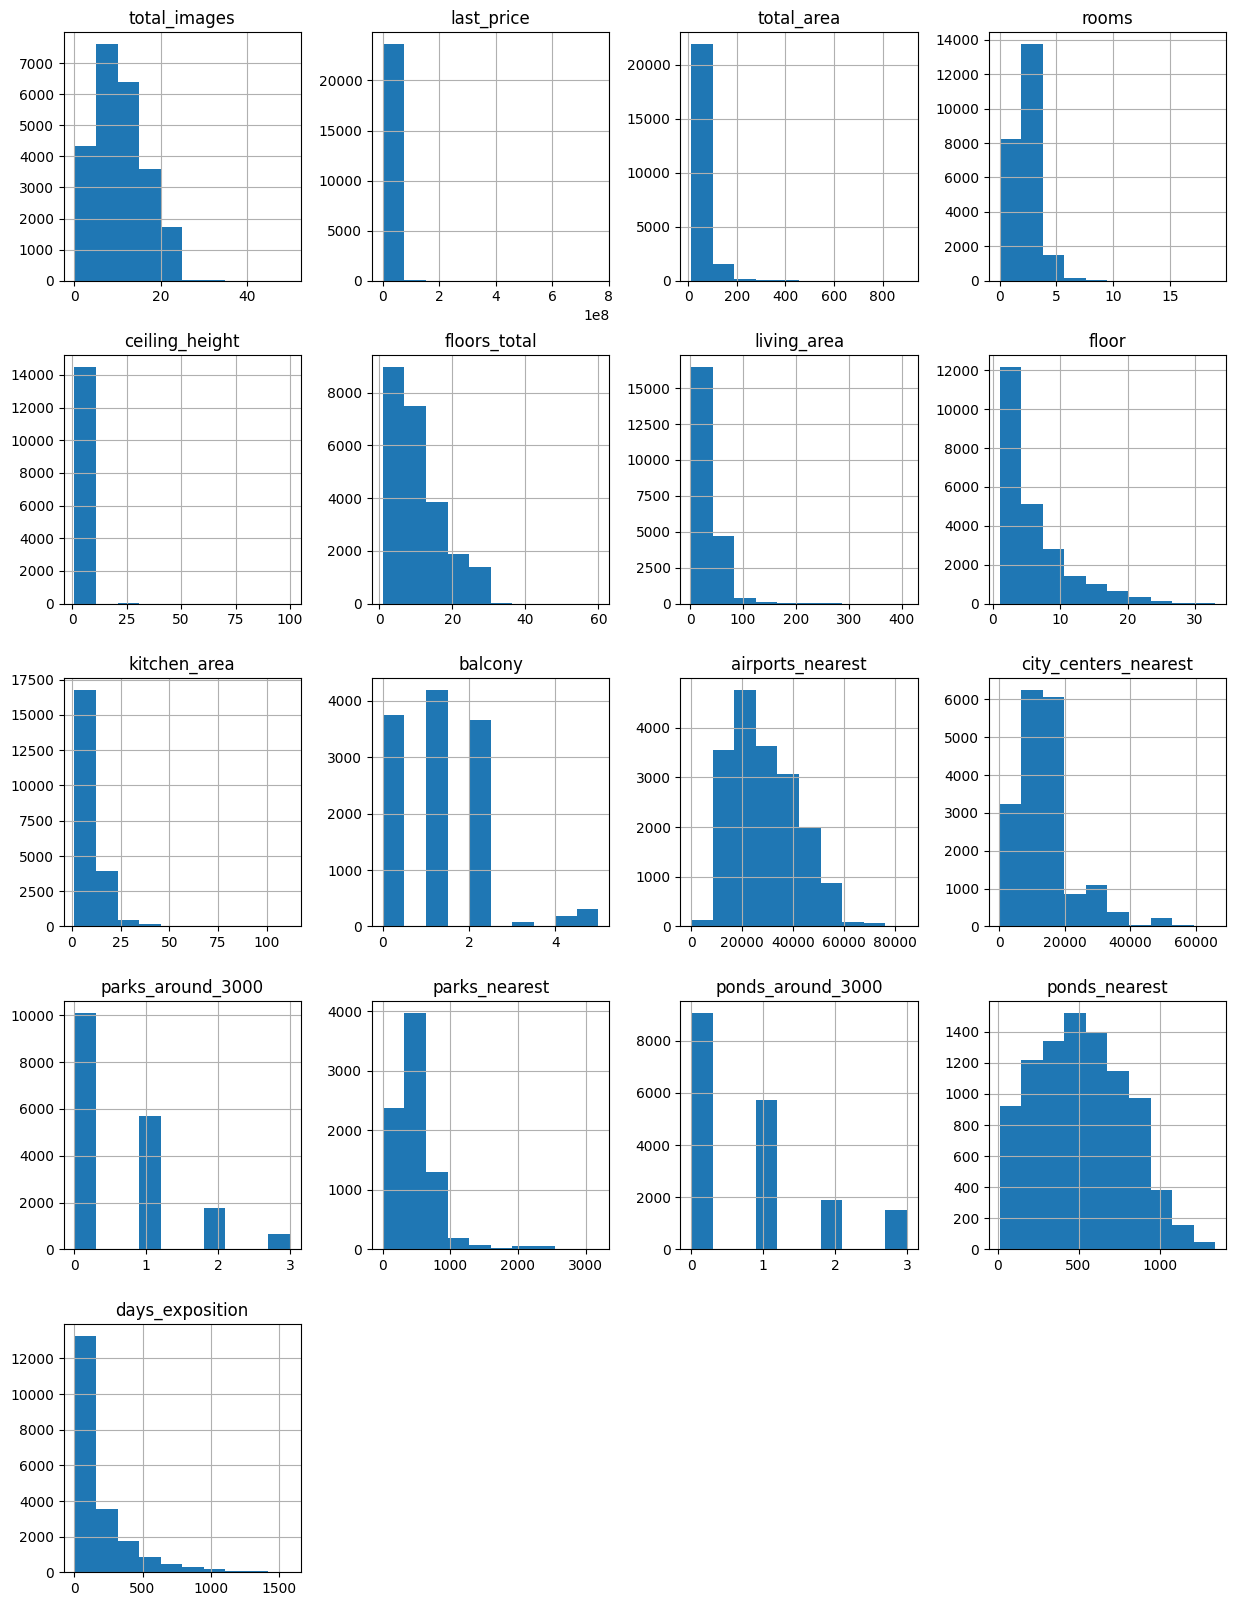

In [4]:
data.hist(figsize=(15, 20)) # строим гистограмму для всех числовых столбцов таблицы
plt.show()

На приведенных выше гистограммах мы видим пики около 0 для: last_price (цена на момент снятия с публикации), total_area (общая площадь квартиры в квадратных метрах), ceiling_height (высота потолков), floors_total (всего этажей в доме), living_area (жилая площадь в квадратных метрах), floor (этаж), kitchen_area (площадь кухни в квадратных метрах), days_exposition (сколько дней было размещено объявление), что может говорить об ошибках в данных.

In [5]:
data.describe() # запрашиваем распределение по каждому из столбцов

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Мы видим, что для ряда столбцов стандартное отклонение велико. Это также может свидетельствовать о наличии в наборе данных серьезных аномалий или выбросов. 
Кроме того, мы видим, что присутствуют маловероятные значения:
1. в столбце ceiling_height (высота потолков) минимальное значение составляет 1 м, а максимальное - 100 м
2. минимальное значение airports_nearest (расстояние до ближайшего аэропорта в метрах) равно 0 (получается, что квартира находится на территории аэропорта)
3. максимальное количество этажей (floors_total) равно 60, что для представленного региона является ошибкой
4. минимальная цена квартиры (last_price) составляет 12 190 руб., что маловероятно
5. минимальная жилая площадь квартиры (living_area) составляет 2 кв. м, что маловероятно
6. минимальная площадь кухни (kitchen_area ) составляет 1,3 кв. м, что маловероятно

### Предобработка данных

In [6]:
data.isna().sum() # выводим информацию о наличии в столбцах пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Как мы видим, пропуски имеются в 14 столбцах из 22. Далее попробуем заполнить пропущенные значения там, где это возможно.
Сейчас обратим внимание на следующее:
1. типом данных для столбца first_day_exposition является object. Учитывая, что в этом столбце хранится информация о дате публикации, заменим тип на значения даты и времени.
2. В столбце is_apartment хранится информация о том, является ли помещение апартаментами. Поэтому приведем значения в этом столбце к логическому типу.
3. Типы данных для столбцов floors_total (всего этажей в доме), balcony (число балконов) и days_exposition (сколько дней было размещено объявление) было бы логичным заменить с вещественного типа на целочисленный. Но в связи с наличием в этих столбцах пропусков мы это сделать пока не сможем.

In [7]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['is_apartment'] = data['is_apartment'].astype('boolean')
data.info() # проверяем, что замена типов проведена успешно

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   boolean       
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [8]:
data['balcony'] = data['balcony'].fillna(0)


Пропуски в столбце с числом балконов обработаем следующим образом. Представляется логичным следующее: если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски будет правильно заменить на 0, что мы и сделали в предыдущей ячейке.

In [9]:
data['balcony'].isna().sum()

0

После замены пропусков на 0 вновь проверили столбец balcony на наличие пропущенных значений. Как мы видим, пропущенные значения в этом столбце теперь отсутствуют.

Для столбца is_apartment логичным будет предположить, что пропуски появились там, где помещение не является апартаментами
(в этом случае пользователи сервиса просто пропускали эту строку при заполнении информации). В этом случае будет правильно заменить все пропущенные значения на False.

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()

0

После замены пропусков на 0 вновь проверили столбец is_apartment на наличие пропущенных значений. Как мы видим, пропущенные значения в этом столбце теперь отсутствуют.

Пропуски в столбце locality_name могут быть связаны как с небрежным заполнением информации пользователем сервиса, так и техническим сбоем. Их значение очень невелико (49), поэтому полагаю возможным удалить те строки, где пропущено название населенного пункта. Учитывая общий объем данных, это не окажет существенного влияния на достоверность исследования. В ячейке ниже проверяем, что строки с пропусками удалены.

In [11]:
data.dropna(subset=['locality_name'],inplace=True)
data['locality_name'].isna().sum()

0

Оставшиеся пропуски в столбцах с количественными переменными будем заменять медианными значениями, т.к. медиана менее чувствительна к выбросам в данных, чем среднее значение. Для корректной замены будем рассчитывать медианное значение для каждого населенного пункта в отдельности, что должно повысить достоверность результата. 

In [12]:
# Заполняем пропуски по высоте потолков медианным значением относительно населенных пунктов
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == t), 'ceiling_height'].median()

In [13]:
# заполняем пропуски в столбце floors_total медианными значениями по каждому типу населенного пункта locality_name
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['floors_total'].isna()), 'floors_total'] = \
    data.loc[(data['locality_name'] == t), 'floors_total'].median()

In [14]:
# заполняем пропуски в столбце living_area медианными значениями по каждому типу населенного пункта locality_name
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['locality_name'] == t), 'living_area'].median()

In [15]:
# заполняем пропуски в столбце kitchen_area медианными значениями по каждому типу населенного пункта locality_name
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['locality_name'] == t), 'kitchen_area'].median()

In [16]:
# заполняем пропуски в столбцеa airports_nearest медианными значениями по каждому типу населенного пункта locality_name
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_name'] == t), 'airports_nearest'].median()

In [17]:
# заполняем пропуски в столбцеa city_centers_nearest медианными значениями по каждому типу населенного пункта locality_name
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['city_centers_nearest'].isna()), 'city_centers_nearest'] = \
    data.loc[(data['locality_name'] == t), 'city_centers_nearest'].median()

In [18]:
# заполняем пропуски в столбцеa parks_around_3000 медианными значениями по каждому типу населенного пункта locality_name
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['parks_around_3000'].isna()), 'parks_around_3000'] = \
    data.loc[(data['locality_name'] == t), 'parks_around_3000'].median()

In [19]:
# заполняем пропуски в столбцеa parks_nearest медианными значениями по каждому типу населенного пункта locality_name
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['parks_nearest'].isna()), 'parks_nearest'] = \
    data.loc[(data['locality_name'] == t), 'parks_nearest'].median()

In [20]:
# заполняем пропуски в столбцеa ponds_around_3000 медианными значениями по каждому типу населенного пункта locality_name
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['ponds_around_3000'].isna()), 'ponds_around_3000'] = \
    data.loc[(data['locality_name'] == t), 'ponds_around_3000'].median()

In [21]:
# заполняем пропуски в столбцеa ponds_nearest медианными значениями по каждому типу населенного пункта locality_name
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = \
    data.loc[(data['locality_name'] == t), 'ponds_nearest'].median()

In [22]:
# заполняем пропуски в столбцеa days_exposition медианными значениями по каждому типу населенного пункта locality_name
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['days_exposition'].isna()), 'days_exposition'] = \
    data.loc[(data['locality_name'] == t), 'days_exposition'].median()

In [23]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height           121
floors_total               0
living_area               17
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area              19
balcony                    0
locality_name              0
airports_nearest        5386
city_centers_nearest    5386
parks_around_3000       5386
parks_nearest           5998
ponds_around_3000       5386
ponds_nearest           5494
days_exposition           80
dtype: int64

Как мы видим, количество пропусков в столбцах удалось существенно сократить:
1. в ceiling_height с 9195 до 0
2. в floors_total с 86 до 0
3. в living_area с 1903 до 17
4. в kitchen_area с 2278 до 19
5. в airports_nearest с 5542 до 5386
6. в city_centers_nearest с 5519 до 5386
7. в parks_around_3000 с 5518 до 5386 
8. в parks_nearest с 15620 до 5998
9. в ponds_around_3000 с 5518 до 5386 
10. в ponds_nearest с 14589 до 5494
11. в days_exposition с 3181 до 80
12. в balcony с 11519 до 0

Часть пропусков заполнить не получилось, т.к. для некоторых населенных пунктов все значения являются пропусками. Наличие пропусков в картографических данных (расстояния до центра города, аэропорта, ближайшего парка) можно связать со сбоем сервиса, а в таких параметрах, как высота потолков, количество этажей, площадь кухни - скорее всего, с нежеланием пользователя тратить время на внесение этой информации либо ошибкой обработки данных.


In [24]:
data.duplicated().sum() # считаем явные дубликаты

0

Как мы видим, явных дубликатов не обнаружено. Поэтому проверим столбец с названиями населенных пунктов на наличие неявных дубликатов.

In [25]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Видим, в наименованиях населенных пунктов используется как слово "поселок", так и слово "посёлок". Для исключения дублирования приведем все названия к "поселок".
Затем видим, что слово "поселок" используется в различных вариантах: это городской поселок, поселок городского типа, поселок при железнодорожной станции, поселок станции, коттеджный поселок. Для выявления дублкатов будет удобно привести их все к наименованию "поселок".
По этой же причине заменим "село" на "деревня".

In [26]:
data['locality_name'] = data['locality_name'].str.replace('посёлок','поселок')


In [27]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции','поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок станции','поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок','поселок')
data['locality_name'] = data['locality_name'].str.replace('село ','деревня')
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

Учитывая, что:
1. при упоминании деревень Калитино, Павлово, Фёдоровское, Щеглово и одноименных поселков речь идет об одних и тех же населенных пунктах (что нетрудно проверить по карте и справочникам)
2. деревня Никольское и Никольское идентичны (речь идет о Никольском городском поселении в Тосненском районе Ленинградской области)
3. деревня Кудрово и Кудрово идентичны (статус города получен в 2018 году)
4. также идентичны Мурино и поселок Мурино, Любань и поселок Любань
5. садовое товарищество Приладожский находится в одноименном поселке (что легко проверить)
6. иных совпадений названий в столбце не обнаружено

поэтому для упрощения дальнейшего анализа уберем перед названиями населенных пунктов слова "поселок", "деревня", "садовое товарищество", "садоводческое некоммерческое товарищество".
Причины различных наименований населенных пунктов очевидно связаны с путаницей между понятиями "деревня" и "поселок", в связи с чем пользователи могли вводить информацию о своем месте жительства по-разному. Также в ряде случаев пользователи не указали тип населенного пункта: полагая, что это очевидно, или по небрежности.


In [28]:
data['locality_name'] = data['locality_name'].str.replace('поселок','')
data['locality_name'] = data['locality_name'].str.replace('деревня','')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество','')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество','')
data['locality_name'].sort_values().unique()


array([' Агалатово', ' Александровская', ' Алексеевка', ' Аннино', ' Аро',
       ' Барышево', ' Батово', ' Бегуницы', ' Белогорка', ' Белоостров',
       ' Большая Вруда', ' Большая Ижора', ' Большая Пустомержа',
       ' Большие Колпаны', ' Большое Рейзино', ' Большой Сабск', ' Бор',
       ' Борисова Грива', ' Бугры', ' Будогощь', ' Ваганово', ' Важины',
       ' Вартемяги', ' Вахнова Кара', ' Вещево', ' Виллози',
       ' Вознесенье', ' Возрождение', ' Войсковицы', ' Войскорово',
       ' Володарское', ' Вырица', ' Выскатка', ' Высокоключевой',
       ' Гаврилово', ' Гарболово', ' Гладкое', ' Глажево', ' Глебычево',
       ' Глинка', ' Гончарово', ' Горбунки', ' Гостилицы', ' Громово',
       ' Дзержинского', ' Дружная Горка', ' Дружноселье', ' Дубровка',
       ' Елизаветино', ' Ефимовский', ' Жил', ' Жилгородок', ' Житково',
       ' Заводской', ' Заклинье', ' Заневка', ' Запорожское', ' Зимитицы',
       ' Извара', ' Ильичёво', ' Иссад', ' Калитино', ' Каложицы',
       ' Кальти

In [29]:
data['locality_name'] = data['locality_name'].str.replace(' ', '') # удалим пробелы в названиях населенных пунктов
data['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'БольшаяВруда', 'БольшаяИжора',
       'БольшаяПустомержа', 'БольшиеКолпаны', 'БольшоеРейзино',
       'БольшойСабск', 'Бор', 'БорисоваГрива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'ВахноваКара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'ДружнаяГорка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жил', 'Жилгородок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара', 'Ильичёво', 'И

Как мы видим, неявные дубликаты в столбце с названиями устранены. Теперь рассмотрим редкие и выбивающиеся значения столбцов таблицы.

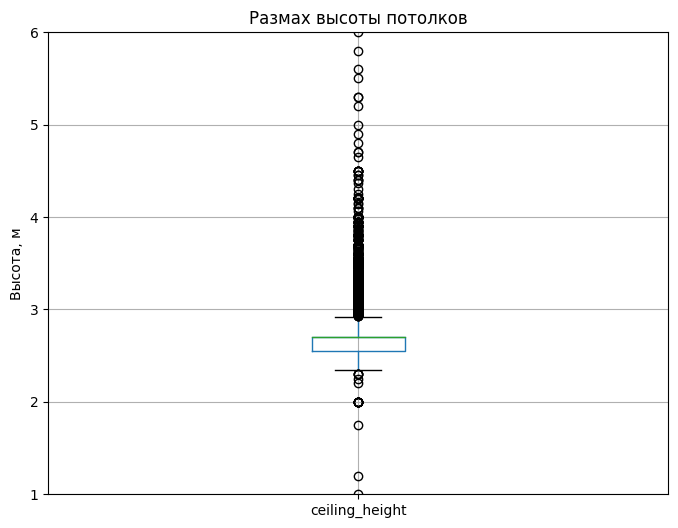

In [30]:
# как мы видели выше, в столбце ceiling_height (высота потолков) минимальное значение составляет 1м, а максимальное - 100 м
# посторим диаграмму размаха
data.boxplot(column='ceiling_height', figsize=(8, 6))
plt.title('Размах высоты потолков')
plt.ylim(1, 6)
plt.ylabel('Высота, м')
plt.show()

Из графика мы видим, что ориентировочная граница нормального размаха высоты потолков составляет значения от 2,5 м до 2,8 м Более высокие и более низкие значения являются выбросами. Внизу они рисуются отдельными точками, а в верхнейчасти сливаются в линию, что говорит о том, что таких выбросов много.

In [31]:
# учитывая вышеизложенное, оставим строки с высотой потолков от 2,5 до 3 метров
data = data.query('2.5 <= ceiling_height <= 5')

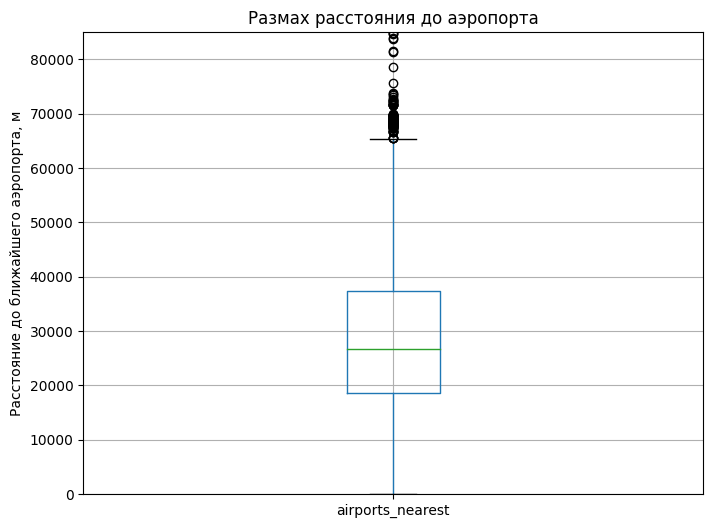

In [32]:
# как мы видели выше, минимальное значение airports_nearest (расстояние до ближайшего аэропорта в метрах) равно 0
# получается, что квартира находится на территории аэропорта
# посторим диаграмму размаха
data.boxplot(column='airports_nearest', figsize=(8, 6))
plt.title('Размах расстояния до аэропорта')
plt.ylim(0, 85000)
plt.ylabel('Расстояние до ближайшего аэропорта, м')
plt.show()

Как мы видим на графике, нижний "ус" упирается в 0. При этом при анализе карты видно, что минимальное расстояние от здания аэропорта Пулково до жилой застройки составляет примерно 1,5 км. Поэтому будет правильно оставить строки с расстоянием от 1 500 до 70 000 м

In [33]:
data = data.query('1500 <= airports_nearest <= 70000')

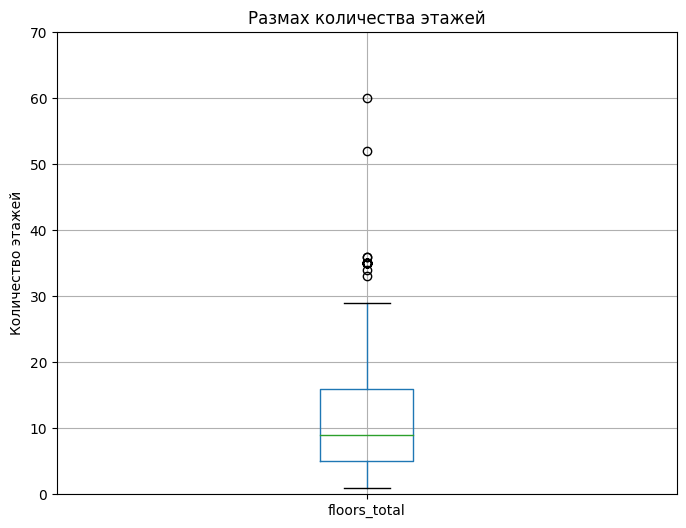

In [34]:
# максимальное количество этажей (floors_total) равно 60, что для представленного региона является ошибкой
# посторим диаграмму размаха
data.boxplot(column='floors_total', figsize=(8, 6))
plt.title('Размах количества этажей')
plt.ylim(0, 70)
plt.ylabel('Количество этажей')
plt.show()

In [35]:
# учитывая полученные данные, оставляем количество этажей в диапазоне от 1 до 30
data = data.query('1 <= floors_total <= 30')

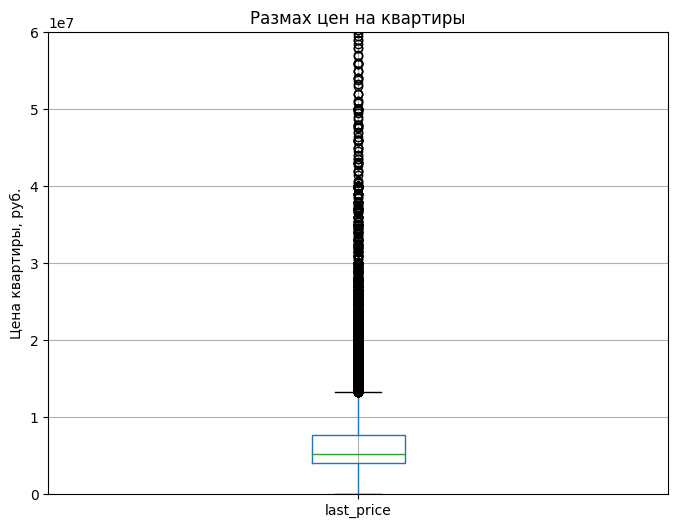

In [36]:
# минимальная цена квартиры (last_price) составляет 12 190 руб., что маловероятно
# построим диаграмму размаха
data.boxplot(column='last_price', figsize=(8, 6))
plt.title('Размах цен на квартиры')
plt.ylim(0, 60000000)
plt.ylabel('Цена квартиры, руб.')
plt.show()

In [37]:
# учитывая полученные данные, оставляем цены на квартиры в диапазоне от 1 000 000 до 20 000 000 руб.
data = data.query('1 <= last_price <= 20000000')

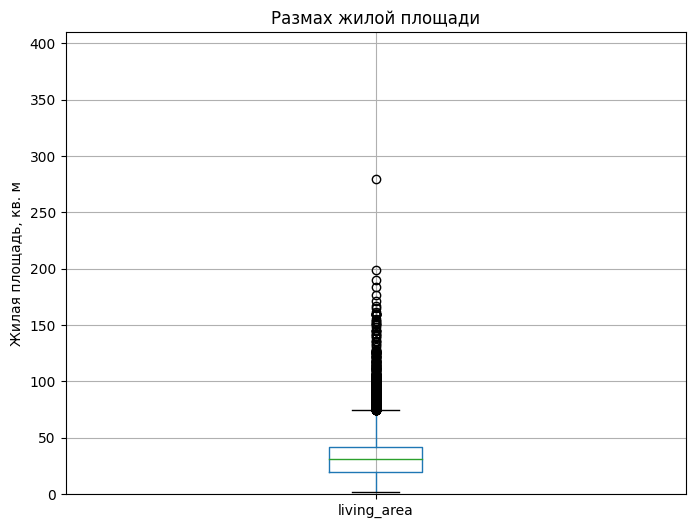

In [38]:
# минимальная жилая площадь квартиры (living_area) составляет 2 кв. м, что маловероятно
# построим диаграмму размаха
data.boxplot(column='living_area', figsize=(8, 6))
plt.title('Размах жилой площади')
plt.ylim(0, 410)
plt.ylabel('Жилая площадь, кв. м')
plt.show()

In [39]:
# ориентировочная граница нормального размаха на этом графике от 2 до 75 кв. м При этом установленный минимальный размер площади жилого помещения
# на человека в СПб и Леноблати составляет 9 кв. м; полагаю, было бы корректным ориентироваться на эту цифру как на нижнюю
# границу. Тогда оставляем диапазон от 9 до 90 кв. м
data = data.query('9 <= living_area <= 90')

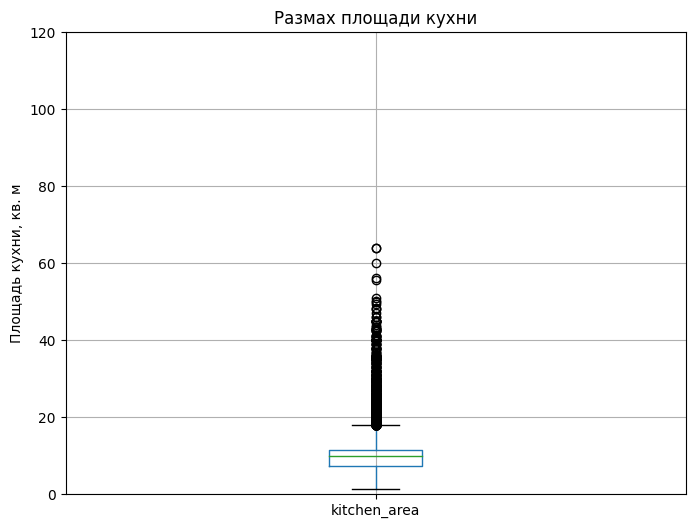

In [40]:
# минимальная площадь кухни (kitchen_area) составляет 1,3 кв. м, что маловероятно
# построим диаграмму размаха
data.boxplot(column='kitchen_area', figsize=(8, 6))
plt.title('Размах площади кухни')
plt.ylim(0, 120)
plt.ylabel('Площадь кухни, кв. м')
plt.show()

In [41]:
# учитывая полученные данные, оставляем площадь кухни в диапазоне от 2 до 20 кв. м (возможно, минимальное значение относится к
# коммунальным квартирам или КГТ)
data = data.query('2 <= kitchen_area <= 20')

На этом предобработка данных завершена. Теперь еще раз запросим распределение по каждому из столбцов и выведем первые 20 строк таблицы на экран.

In [42]:
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,16669.000000,1.666900e+04,16669.000000,16669,16669.000000,16669.000000,16669.000000,16669.000000,16669.000000,16669.000000,16669.000000,16669.000000,16669.000000,16669.000000,16076.000000,16669.000000,16572.000000,16669.000000
mean,9.871438,5.889270e+06,56.359603,2017-11-06 19:15:41.844141824,2.010559,2.704487,11.306317,32.280879,6.161977,9.667772,0.586118,28904.022557,14669.544724,0.568180,477.340072,0.724339,514.521512,165.752535
min,0.000000,1.190000e+06,12.000000,2014-11-27 00:00:00,0.000000,2.500000,1.000000,9.000000,1.000000,2.000000,0.000000,6450.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.950000e+06,40.000000,2017-05-06 00:00:00,1.000000,2.600000,5.000000,19.000000,3.000000,7.100000,0.000000,18233.000000,10278.000000,0.000000,433.750000,0.000000,475.000000,45.000000
50%,10.000000,5.000000e+06,51.360000,2017-12-06 00:00:00,2.000000,2.700000,9.000000,31.000000,5.000000,9.700000,0.000000,26941.000000,13382.000000,0.000000,460.000000,0.000000,503.000000,95.000000
75%,14.000000,6.900000e+06,67.700000,2018-08-25 00:00:00,3.000000,2.700000,16.000000,40.400000,8.000000,11.000000,1.000000,37593.000000,16556.000000,1.000000,460.000000,1.000000,564.000000,194.000000
max,50.000000,2.000000e+07,238.260000,2019-05-03 00:00:00,9.000000,4.800000,29.000000,90.000000,27.000000,20.000000,5.000000,69785.000000,61495.000000,3.000000,3190.000000,3.000000,1344.000000,1553.000000
std,5.625158,2.897324e+06,21.969340,NaN,0.952500,0.202797,6.484905,14.314924,4.952236,3.098864,0.954497,12822.456723,8396.445860,0.768413,230.029348,0.901374,196.566819,204.807066


In [43]:
data = data.reset_index(drop=True)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,7,3350000.0,40.4,2018-12-04,1,2.63,11.0,18.6,1,False,...,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,584.5,81.0
1,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
2,6,3700000.0,37.3,2017-11-02,1,2.64,26.0,10.6,6,False,...,14.4,1.0,Парголово,52996.0,19143.0,0.0,733.0,0.0,593.0,155.0
3,5,7915000.0,71.6,2019-04-18,2,2.70,24.0,31.3,22,False,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,460.0,0.0,503.0,95.0
4,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,460.0,0.0,503.0,289.0
5,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,8.5,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
6,9,3300000.0,44.0,2018-08-27,2,2.55,5.0,31.0,4,False,...,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,407.0,0.0,553.0,7.0
7,20,3550000.0,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,...,5.2,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0
8,1,4400000.0,36.0,2016-06-23,1,2.60,6.0,17.0,1,False,...,8.0,0.0,Пушкин,20782.0,30759.0,0.0,399.5,1.0,96.0,203.0
9,16,4650000.0,39.0,2017-11-18,1,2.70,14.0,20.5,5,False,...,7.6,1.0,Санкт-Петербург,12900.0,14259.0,1.0,590.0,1.0,296.0,19.0


In [44]:
# меняем тип данных с вещественного на целочисленный
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
data.info() # проверяем, что замена типов проведена успешно

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16669 entries, 0 to 16668
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          16669 non-null  int64         
 1   last_price            16669 non-null  float64       
 2   total_area            16669 non-null  float64       
 3   first_day_exposition  16669 non-null  datetime64[ns]
 4   rooms                 16669 non-null  int64         
 5   ceiling_height        16669 non-null  float64       
 6   floors_total          16669 non-null  int32         
 7   living_area           16669 non-null  float64       
 8   floor                 16669 non-null  int64         
 9   is_apartment          16669 non-null  boolean       
 10  studio                16669 non-null  bool          
 11  open_plan             16669 non-null  bool          
 12  kitchen_area          16669 non-null  float64       
 13  balcony         

Данные в таблице выглядят реалистично.

Таким образом, на этапе предобработки данных мы изменили типы данных, привели имена столбцов к единому стилю, обработали явные и неявные дубликаты, а также пропуски. Переходим к следующему этапу.

### Посчитайте и добавьте в таблицу новые столбцы

Для дальнейшего исследования добавим в таблицу столбцы со следующими параметрами:
- цена одного квадратного метра
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние до центра города в километрах

In [45]:
# добавляем столбец с информацией о цене одного квадратного метра
data['price_one_square_meter'] = data['last_price'] / data['total_area']
# округляем полученный результат до копеек
data['price_one_square_meter']=data['price_one_square_meter'].round(2)

In [46]:
# добавляем столбец с днем недели публикации объявления
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday
# добавляем столбец с месяцем публикации
data['exposition_month'] = data['first_day_exposition'].dt.month
# добавляем столбец с годом публикации
data['exposition_year'] = data['first_day_exposition'].dt.year

In [47]:
# используем функцию, чтобы разбить этажность на 3 категории: первый, последний и другой
def get_floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'


In [48]:
# добавляем столбец с типом этажа
data['floor_category'] = data.apply(get_floor_category, axis=1)

In [49]:
# добавляем столбец с расстоянием до центра города в км, округляем до целых значений
data['city_centers_nearest_km'] = round(data['city_centers_nearest']/1000)

In [50]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,7,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,NaN,0.0,584.5,81,82920.79,1,12,2018,первый,19.0
1,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,90.0,2.0,574.0,558,92785.71,3,8,2015,другой,14.0
2,6,3700000.0,37.3,2017-11-02,1,2.64,26,10.6,6,False,...,733.0,0.0,593.0,155,99195.71,3,11,2017,другой,19.0
3,5,7915000.0,71.6,2019-04-18,2,2.70,24,31.3,22,False,...,460.0,0.0,503.0,95,110544.69,3,4,2019,другой,12.0
4,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,460.0,0.0,503.0,289,88524.59,6,2,2017,другой,15.0
5,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,310.0,2.0,553.0,137,127525.25,3,11,2017,другой,14.0
6,9,3300000.0,44.0,2018-08-27,2,2.55,5,31.0,4,False,...,407.0,0.0,553.0,7,75000.00,0,8,2018,другой,52.0
7,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,False,...,294.0,3.0,298.0,366,82943.93,5,7,2017,последний,33.0
8,1,4400000.0,36.0,2016-06-23,1,2.60,6,17.0,1,False,...,399.5,1.0,96.0,203,122222.22,3,6,2016,первый,31.0
9,16,4650000.0,39.0,2017-11-18,1,2.70,14,20.5,5,False,...,590.0,1.0,296.0,19,119230.77,5,11,2017,другой,14.0


Мы добавили в таблицу необходимые для дальнейшего исследования столбцы. Переходим к исследовательскому анализу данных.

### Проведите исследовательский анализ данных

**Изучение параметров объектов недвижимости**

**Изучение общей площади**

In [51]:
# посмотрим распределение по столбцу со значениями общей площади
data['total_area'].describe()

count    16669.000000
mean        56.359603
std         21.969340
min         12.000000
25%         40.000000
50%         51.360000
75%         67.700000
max        238.260000
Name: total_area, dtype: float64

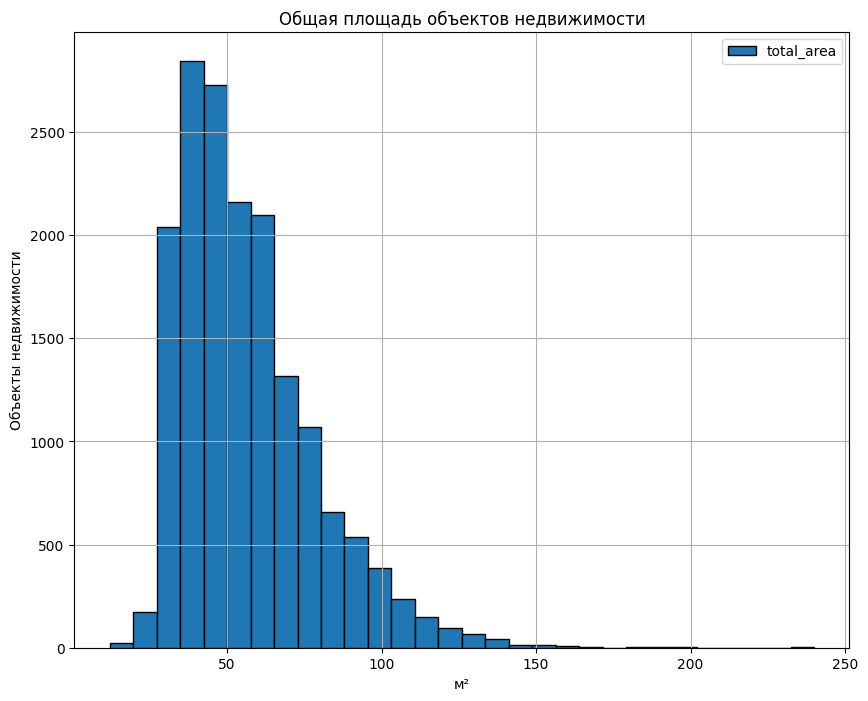

In [52]:
# построим гистограмму
data['total_area'].hist(bins=30, range=(12, 240), figsize=(10, 8), ec='black', legend=True)
plt.title('Общая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('Объекты недвижимости')
plt.show()

Как мы видим, большая часть объектов недвижимости имеют площади в диапазоне от 30 до 65 кв.м Пик гистограммы приходится на значение 35 кв.м Значения менее 30 кв.м и более 100 кв.м довольно редки. Среднее значение (56 кв.м) по отношению к пику сдвинуто в сторону больших значений. Провалы и выбросы отсутствуют.  

**Изучение жилой площади**

In [53]:
# посмотрим распределение по столбцу со значениями жилой площади
data['living_area'].describe()

count    16669.000000
mean        32.280879
std         14.314924
min          9.000000
25%         19.000000
50%         31.000000
75%         40.400000
max         90.000000
Name: living_area, dtype: float64

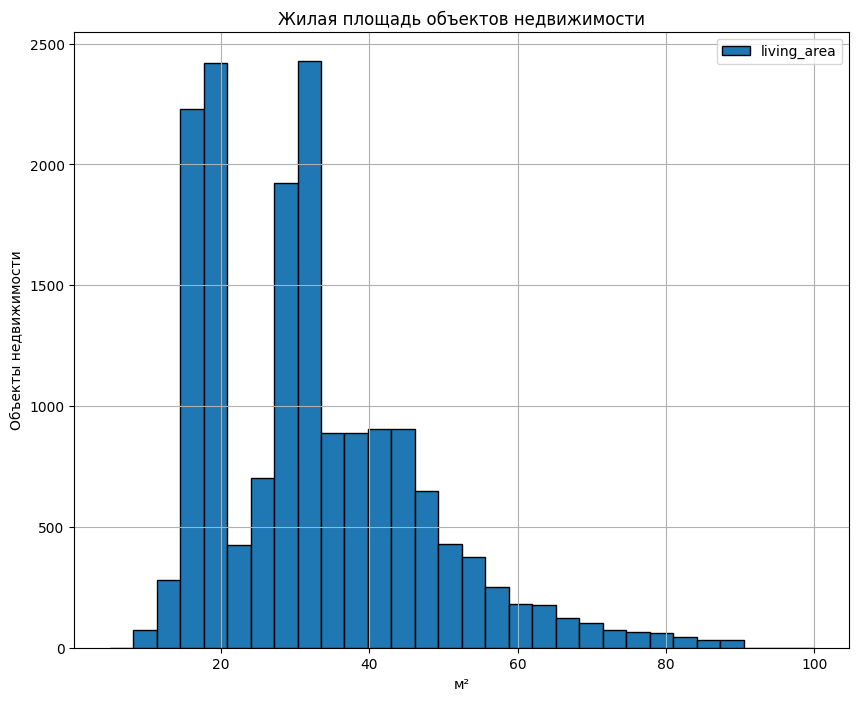

In [54]:
# построим гистограмму
data['living_area'].hist(bins=30, range=(5, 100), figsize=(10, 8), ec='black', legend=True)
plt.title('Жилая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('Объекты недвижимости')
plt.show()

Гистограмма имеет 2 основных пика: на значениях примерно 20 кв.м и 30 кв.м Между ними имеется существенный провал. Наиболее редко встречаются значения меньше 10 кв.м и больше 60 кв.м Среднее значение составляет 32 кв.м  

**Изучение площади кухни**

In [55]:
# посмотрим распределение по столбцу со значениями площади кухни
data['kitchen_area'].describe()

count    16669.000000
mean         9.667772
std          3.098864
min          2.000000
25%          7.100000
50%          9.700000
75%         11.000000
max         20.000000
Name: kitchen_area, dtype: float64

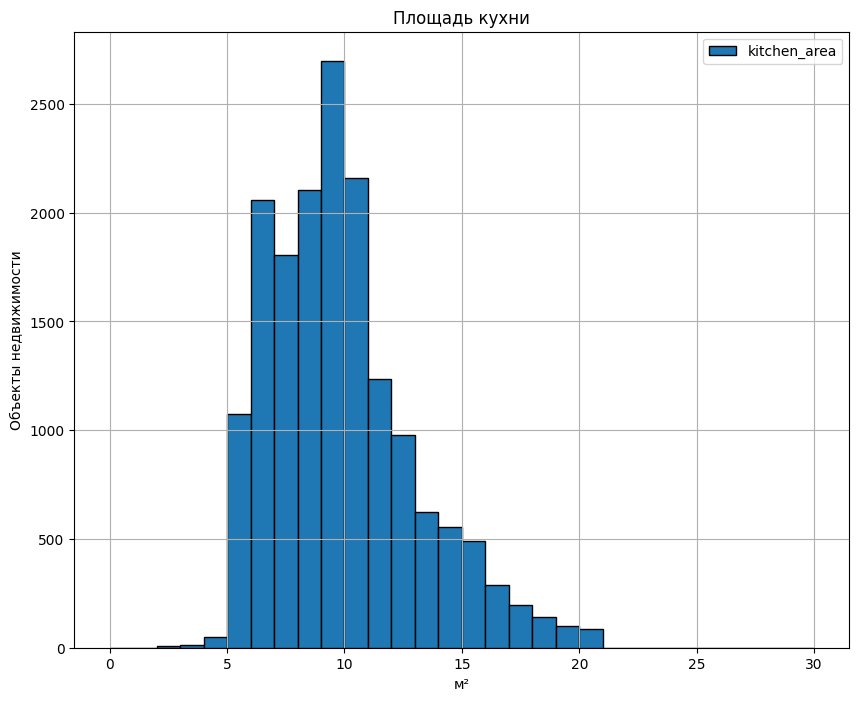

In [56]:
# построим гистограмму
data['kitchen_area'].hist(bins=30, range=(0, 30), figsize=(10, 8), ec='black', legend=True)
plt.title('Площадь кухни')
plt.xlabel('м²')
plt.ylabel('Объекты недвижимости')
plt.show()

Наиболее часто встречающееся значение площади кухни составляет примерно 10 кв.м; иные значения встречаются реже. Среднее значение - 9,7 кв.м Наиболее редко встречаются значения меньше 5 кв.м и более 15 кв.м 

**Изучение цены объекта недвижимости**

In [57]:
# посмотрим распределение по столбцу со значениями цены объектов недвижимости
data['last_price'].describe()

count    1.666900e+04
mean     5.889270e+06
std      2.897324e+06
min      1.190000e+06
25%      3.950000e+06
50%      5.000000e+06
75%      6.900000e+06
max      2.000000e+07
Name: last_price, dtype: float64

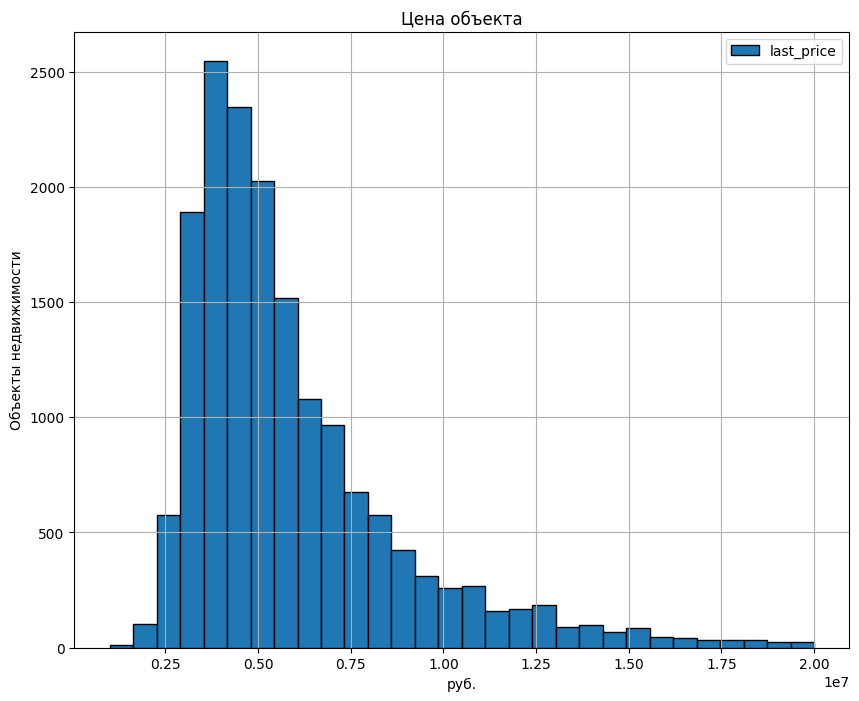

In [58]:
# построим гистограмму
data['last_price'].hist(bins=30, range=(1000000, 20000000), figsize=(10, 8), ec='black', legend=True)
plt.title('Цена объекта')
plt.xlabel('руб.')
plt.ylabel('Объекты недвижимости')
plt.show()

Наиболее часто встречается цена объектов недвижимости в диапазоне от 3 500 000 руб. до 4 500 000 руб. Наиболее редко встречаются цены ниже 2 500 000 руб. и выше 7 500 000 руб. Среднее значение - 5 890 000 руб. (т.е. смещено от пика в сторону более высоких значений: на гистограмме справа от пика мы видим длинный "хвост" из редко встречающихся значений высокого ценового диапазона)

**Изучение данных по количеству комнат**

In [59]:
# посмотрим распределение по столбцу со значениями данных по количеству комнат
data['rooms'].describe()

count    16669.000000
mean         2.010559
std          0.952500
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64

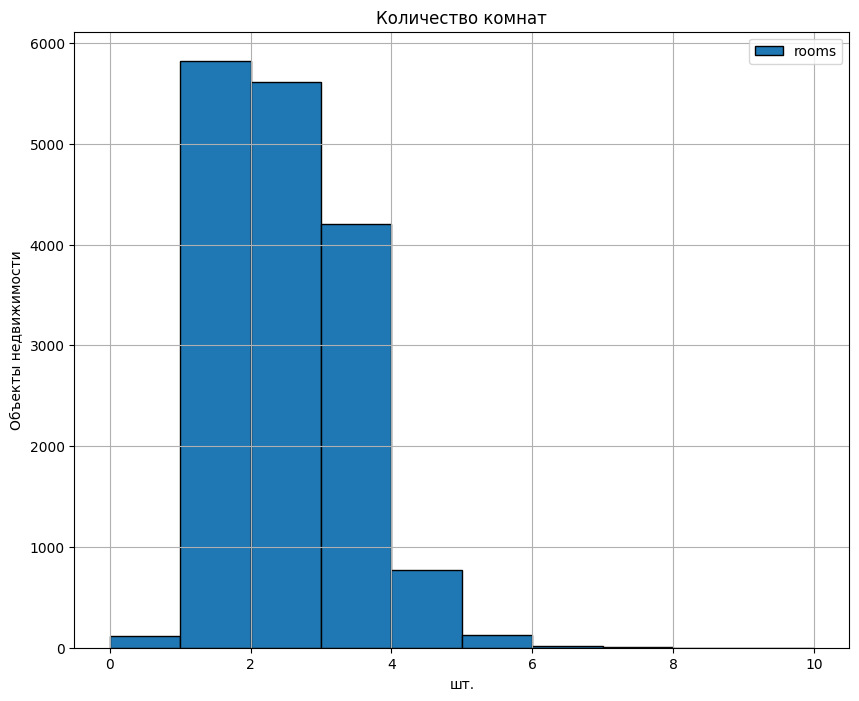

In [60]:
# построим гистограмму
data['rooms'].hist(bins=10, range=(0, 10), figsize=(10, 8), ec='black', legend=True)
plt.title('Количество комнат')
plt.xlabel('шт.')
plt.ylabel('Объекты недвижимости')
plt.show()

Как мы видим, наиболее часто встречаются двухкомнатные и трехкомнатные квартиры (причем пик приходится именно на двухкомнатные). Реже встречаются четырехкомнатные. Варианты от 5 комнат и больше встречаются крайне редко. И среднее, и медиана - 2 комнаты

**Изучение высоты потолков объектов недвижимости**

In [61]:
# посмотрим распределение по столбцу со значениями данных по высоте потолков
data['ceiling_height'].describe()

count    16669.000000
mean         2.704487
std          0.202797
min          2.500000
25%          2.600000
50%          2.700000
75%          2.700000
max          4.800000
Name: ceiling_height, dtype: float64

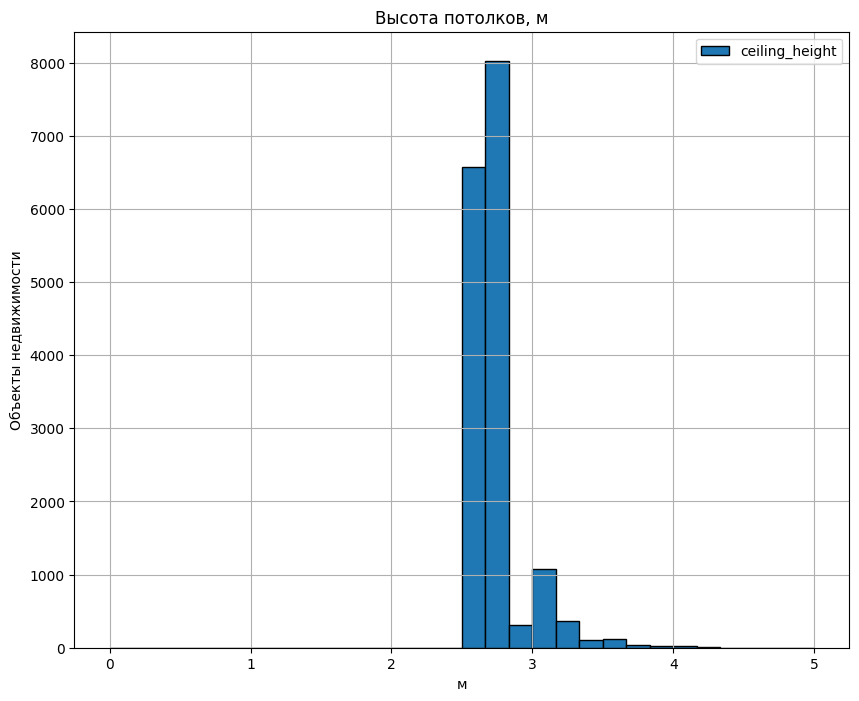

In [62]:
# построим гистограмму
data['ceiling_height'].hist(bins=30, range=(0, 5), figsize=(10, 8), ec='black', legend=True)
plt.title('Высота потолков, м')
plt.xlabel('м')
plt.ylabel('Объекты недвижимости')
plt.show()

Как видно на гистограмме, высота потолков объектов недвижимости представлена в двух вариантах: 2,5 м и 2,7 м Иные варианты встречаются крайне редко. Среднее значение составляет 2,7 м, что соответствует пику нашей гистограммы.

**Изучение сведение об этажах объектов недвижимости**

In [63]:
# посмотрим распределение по столбцу со значениями данных по этажам
data['floor'].describe()

count    16669.000000
mean         6.161977
std          4.952236
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

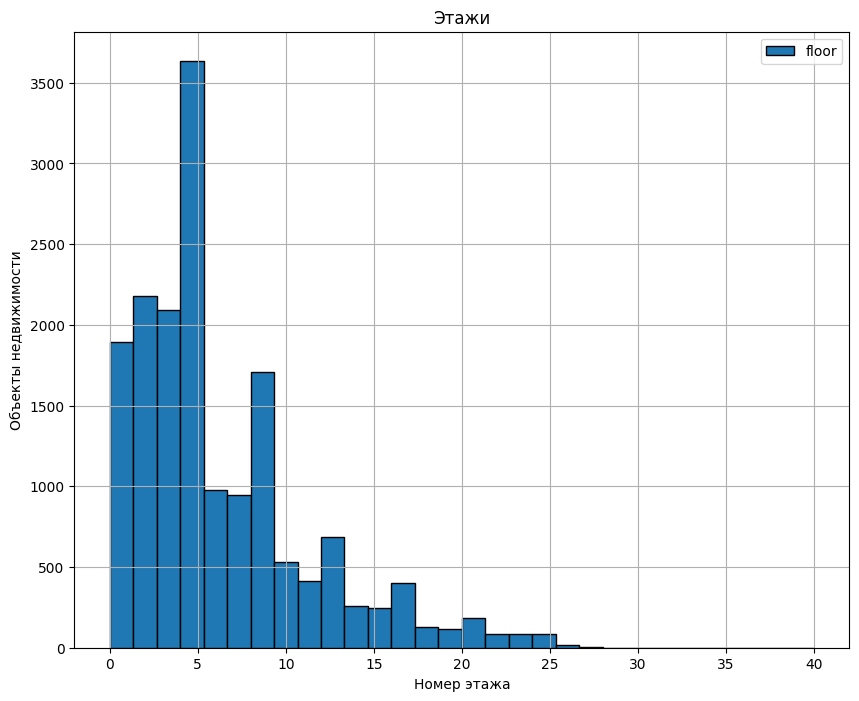

In [64]:
# построим гистограмму
data['floor'].hist(bins=30, range=(0, 40), figsize=(10, 8), ec='black', legend=True)
plt.title('Этажи')
plt.xlabel('Номер этажа')
plt.ylabel('Объекты недвижимости')
plt.show()

Как мы видим, пик приходится на 5-й этаж: он стречаются наиболее часто. Менее распространены 1-й, 2-й, 3-й и 4-й. Для объектов, расположенных выше 5-го этажа, наблюдается следующая закономерность: с увеличением этажа уменьшается количество таких объектов. Объекты, расположенные выше 17 этажа, встречаются крайне редко. Среднее значение - 6 этажей.  

**Изучение сведений о типах этажа квартиры («первый», «последний», «другой»)**

In [65]:
# посмотрим распределение по столбцу со значениями данных по типу этажа
data['floor_category'].describe()

count      16669
unique         3
top       другой
freq       12713
Name: floor_category, dtype: object

In [66]:
# посмотрим на количество значений в каждой категории
data['floor_category'].value_counts()

floor_category
другой       12713
последний     2060
первый        1896
Name: count, dtype: int64

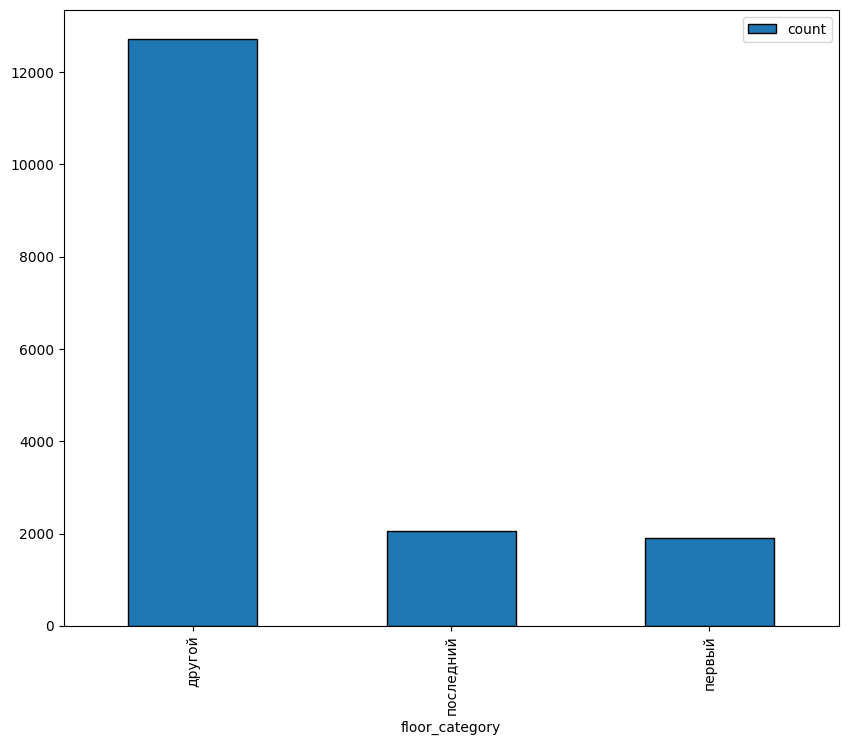

In [67]:
# отобразим это на графике
data['floor_category'].value_counts().plot.bar(figsize=(10, 8), ec='black', legend=True)
plt.show()

Как мы видим, объекты в основном расположены между первым и последним этажами. Доли объектов, расположенных на первом и на последнем этажах, примерно равны.

**Изучение сведений об общем количестве этажей в доме**

In [68]:
# посмотрим распределение по общему количеству этажей в доме
data['floors_total'].describe()

count    16669.000000
mean        11.306317
std          6.484905
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

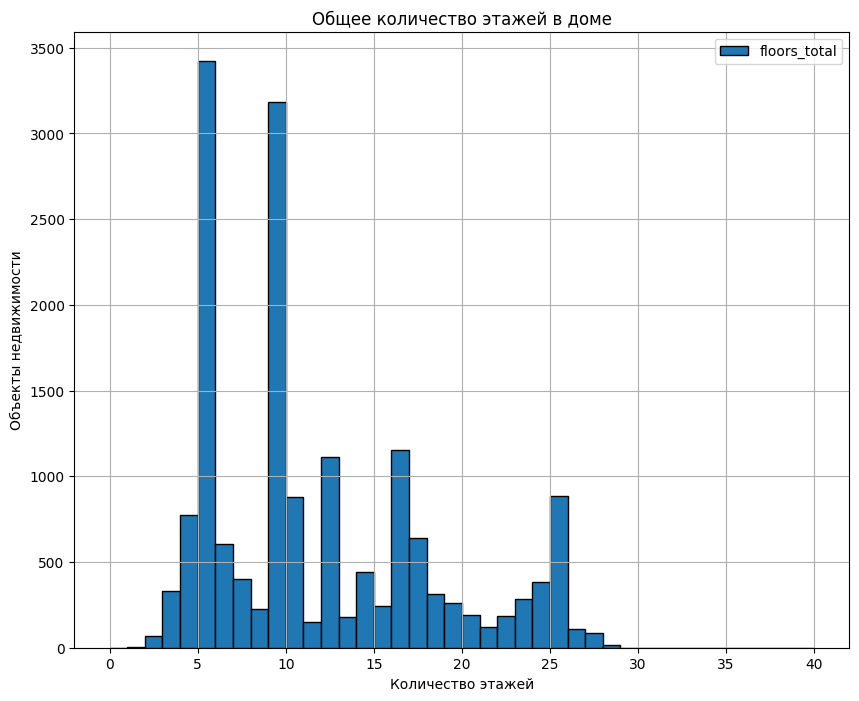

In [69]:
# построим гистограмму
data['floors_total'].hist(bins=40, range=(0, 40), figsize=(10, 8), ec='black', legend=True)
plt.title('Общее количество этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Объекты недвижимости')
plt.show()

Как мы видим, наиболее распространены дома высотой в 6 или 10 этажей. Остальные встречаются значительно реже. Среднее значение приходится на 11 этаж.

**Изучение расстояния до центра города**

In [70]:
# посмотрим распределение по значениям расстояния до центра города
data['city_centers_nearest'].describe()

count    16669.000000
mean     14669.544724
std       8396.445860
min        208.000000
25%      10278.000000
50%      13382.000000
75%      16556.000000
max      61495.000000
Name: city_centers_nearest, dtype: float64

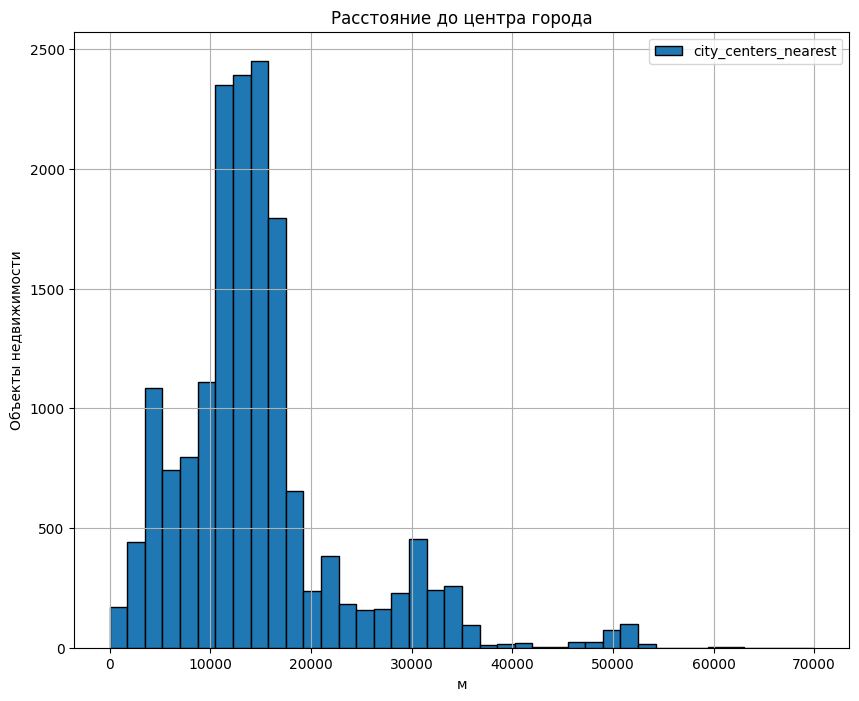

In [71]:
# построим гистограмму
data['city_centers_nearest'].hist(bins=40, range=(0, 70000), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до центра города')
plt.xlabel('м')
plt.ylabel('Объекты недвижимости')
plt.show()

Как мы видим, наиболее распространены объекты, расположенные на расстоянии от 11 до 16 км от центра города. Остальные варианты представлены реже. Среднее значение - 14,7 км

**Изучение расстояния до ближайшего аэропорта**

In [72]:
# посмотрим распределение по значениям расстояния до ближайшего аэропорта
data['airports_nearest'].describe()

count    16669.000000
mean     28904.022557
std      12822.456723
min       6450.000000
25%      18233.000000
50%      26941.000000
75%      37593.000000
max      69785.000000
Name: airports_nearest, dtype: float64

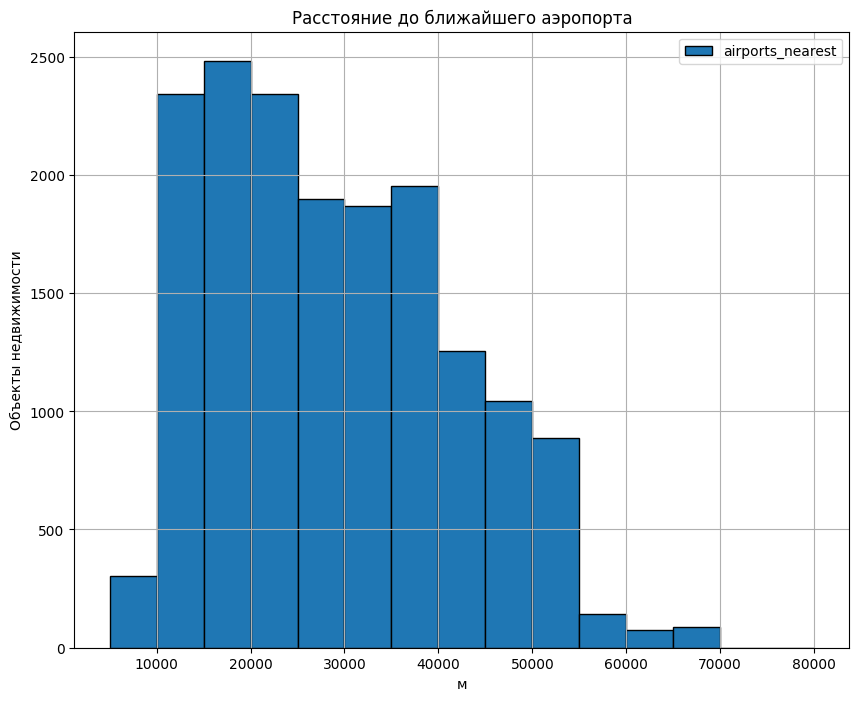

In [73]:
# построим гистограмму
data['airports_nearest'].hist(bins=15, range=(5000, 80000), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('м')
plt.ylabel('Объекты недвижимости')
plt.show()

Наиболее часто встречаются объекты, удаленные от ближайшего аэропорта на расстояние от 15 до 25 км, реже - 30-40 км Объекты, расположенные на расстоянии менее 10 км и более 60 км от аэропорта, встречаются крайе редко. Среднее - 29 км

**Изучение расстояния до ближайшего парка**

In [74]:
# посмотрим распределение по значениям расстояния до ближайшего парка
data['parks_nearest'].describe()

count    16076.000000
mean       477.340072
std        230.029348
min          1.000000
25%        433.750000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64

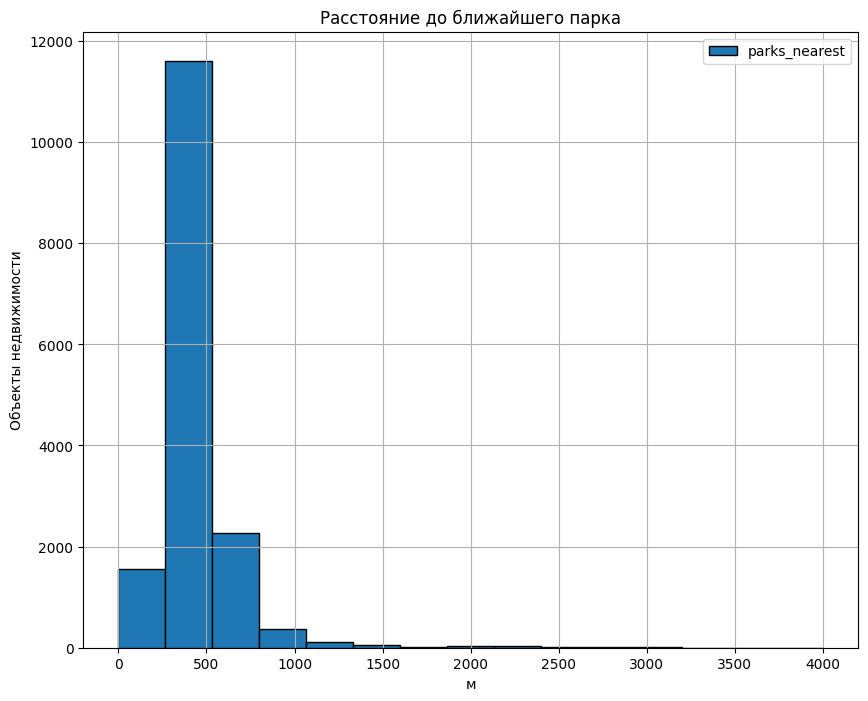

In [75]:
# построим гистограмму
data['parks_nearest'].hist(bins=15, range=(0, 4000), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до ближайшего парка')
plt.xlabel('м')
plt.ylabel('Объекты недвижимости')
plt.show()

Большинство объектов находятся на расстоянии 500 м от парка. Иные варианты довольно редки. Среднее - 477 м

**Изучение дня публикации объявления**

In [76]:
# посмотрим распределение по столбцу с днем публикации
data['exposition_weekday'].describe()

count    16669.000000
mean         2.564221
std          1.786554
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: exposition_weekday, dtype: float64

In [77]:
# посмотрим на количество значений по каждому дню недели
data['exposition_weekday'].value_counts()

exposition_weekday
3    2985
1    2967
4    2834
2    2821
0    2531
5    1343
6    1188
Name: count, dtype: int64

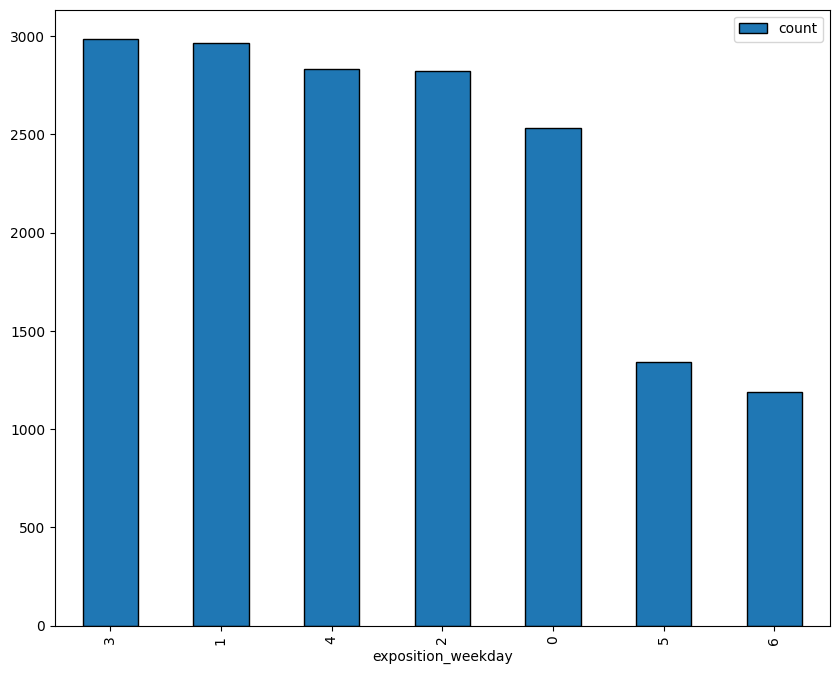

In [78]:
# отобразим это на графике
data['exposition_weekday'].value_counts().plot.bar(figsize=(10, 8), ec='black', legend=True)
plt.show()

Мы видим, что наиболее часто объявления публиковали в будние дни, причем максимум приходится на вторник и четверг. В выходные дни публиковали реже.

**Изучение месяца публикации объявления**

In [79]:
# посмотрим распределение по столбцу с месяцем публикации
data['exposition_month'].describe()

count    16669.000000
mean         6.407163
std          3.467076
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: exposition_month, dtype: float64

In [80]:
# посмотрим на количество значений по каждому месяцу
data['exposition_month'].value_counts()

exposition_month
2     1851
3     1781
4     1711
11    1682
10    1533
9     1410
8     1254
6     1246
7     1194
12    1079
1     1016
5      912
Name: count, dtype: int64

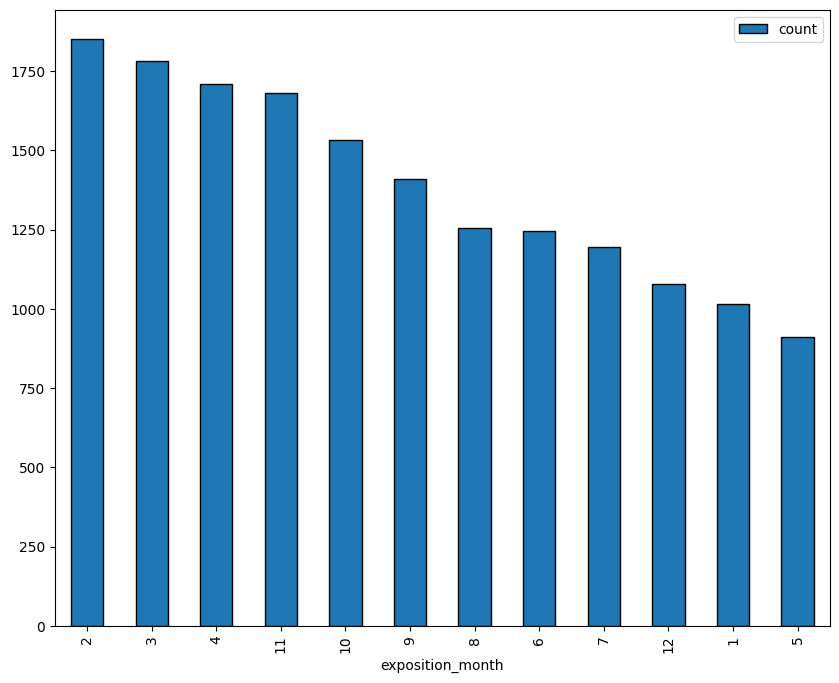

In [81]:
# отобразим это на графике
data['exposition_month'].value_counts().plot.bar(figsize=(10, 8), ec='black', legend=True)
plt.show()

Видно, что наибольшее количество опубликованных объявлений приходится на февраль, март, апрель и ноябрь (максимум - в феврале). Наименьшее значение приходится на январь и май. Возможно, это связано с количеством выходных и праздничных дней (которых в эти месяцы больше).

**Вывод по разделу *Исследовательский анализ данных*:**
на основе анализа полученных данных можно составить «портрет» типичного объявления, размещенного на сервисе Яндекс Недвижимость. Это опубликованное в будний день (чаще вторник или четверг) с февраля по апрель включительно объявление о продаже квартиры, имеющей следующие параметры:
- двухкомнатная либо трехкомнатная квартира
- с общей площадью в диапазоне от 30 до 65 кв.м
- жилой площадью 20 кв.м либо 30 кв.м 
- площадью кухни 10 кв.м
- с высотой потолков 2,5 м или 2,7 м
- расположенная на 5-м этаже шести или десятиэтажного дома
- на расстоянии от 11 до 16 км от центра города
- на расстоянии 500 м от парка
-  и от 15 до 25 км до ближайшего аэропорта
- с ценой в диапазоне от 3 500 000 руб. до 4 500 000 руб.


**Изучим насколько быстро продавались квартиры**

Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 

In [82]:
# посмотрим распределение по значениям столбца days_exposition
data['days_exposition'].describe()

count    16669.000000
mean       165.752415
std        204.807092
min          1.000000
25%         45.000000
50%         95.000000
75%        194.000000
max       1553.000000
Name: days_exposition, dtype: float64

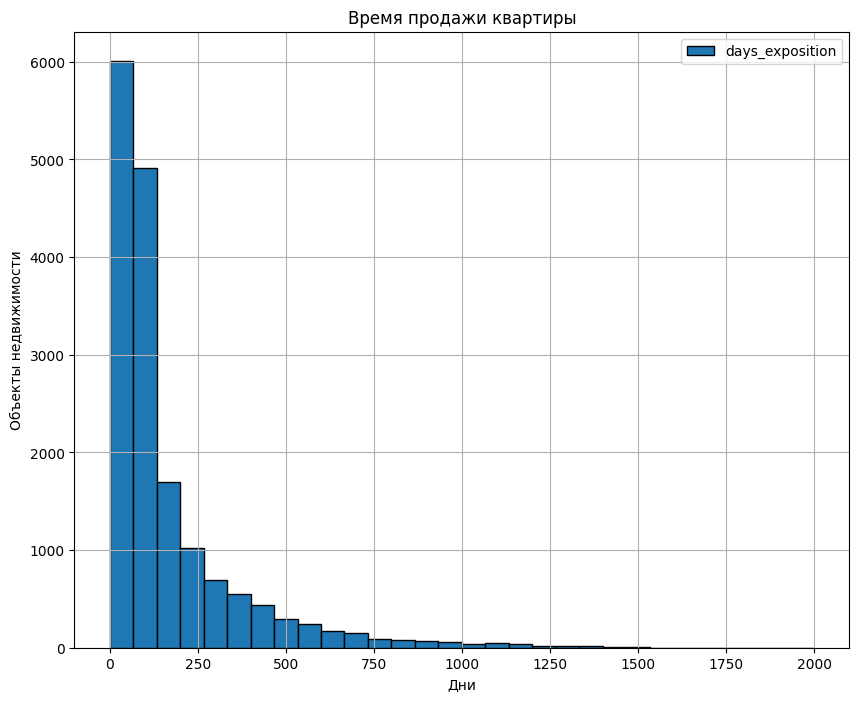

In [83]:
# построим гистограмму
data['days_exposition'].hist(bins=30, range=(0, 2000), figsize=(10, 8), ec='black', legend=True)
plt.title('Время продажи квартиры')
plt.xlabel('Дни')
plt.ylabel('Объекты недвижимости')
plt.show()

Как можно видеть на гистограмме, большинство квартир продается в срок до 125 дней (т.е. примерно 4 месяца). Максимальное значение на гистограмме приходится на 63 дня, т.е. наиболее часто квартиры продают за 2 месяца. Среднее значение - 166 дней, медиана - 95 дней.

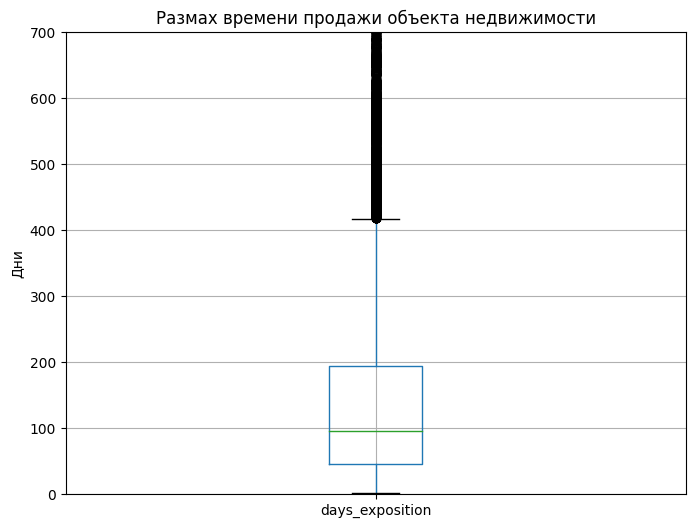

In [84]:
# потроим диаграмму размаха времени продажи объекта недвижимости
data.boxplot(column='days_exposition', figsize=(8, 6))
plt.title('Размах времени продажи объекта недвижимости')
plt.ylim(0, 700)
plt.ylabel('Дни')
plt.show()

Ориентировочная граница нормального размаха на этом графике: от 0 до 420 дней. Таким образом, можно сделасть следующий вывод:
- **быстрыми можно считать продажи, когда объект продан в срок до 50 дней**
- **нормальная продажа - когда объект продан в срок от 50 до 200 дней**
- **долгая продажа - когда объект продан в срок от 200 до 420 дней**
- **продажи свыше 420 дней являются выбросами**

**Изучим факторы, которые больше всего влияют на общую (полную) стоимость объекта**

**Выясним, зависит ли цена квартиры от ее общей площади**

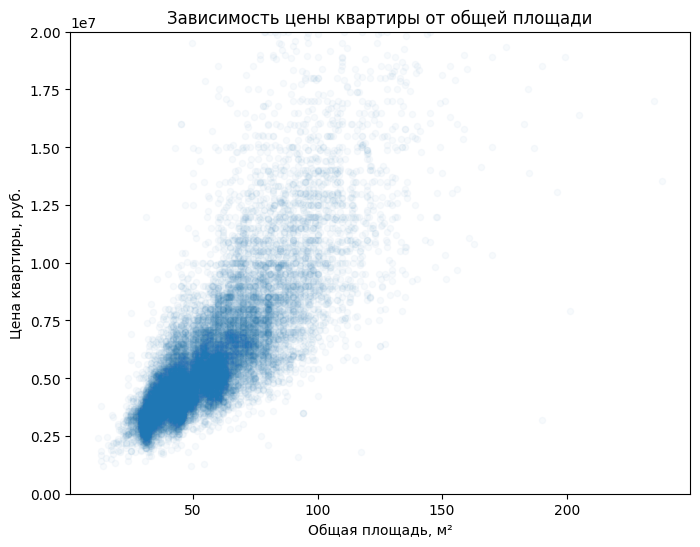

In [85]:
# построим диаграмму рассеяния
data.plot(x='total_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость цены квартиры от общей площади')
plt.xlabel('Общая площадь, м²')
plt.ylabel('Цена квартиры, руб.')
plt.ylim(0, 20000000)
plt.show()



Как мы видим, наибольшее количество данных имеется для квартир стоимостью до 7,5 млн. руб. и общей площадью до 100 кв.м Также на графике видна зависимость цены квартиры от ее общей площади: цена растет с увеличением общей площади. При этом зависимость является прямопропорциональной.
Далее рассчитаем коэффициент корреляции.

In [86]:
data['total_area'].corr(data['last_price'])

0.7971236958383845

Значение коэффициента корреляции также подтверждает наличие зависимости -  цена растет с увеличением общей площади

**Выясним, зависит ли цена квартиры от ее жилой площади**

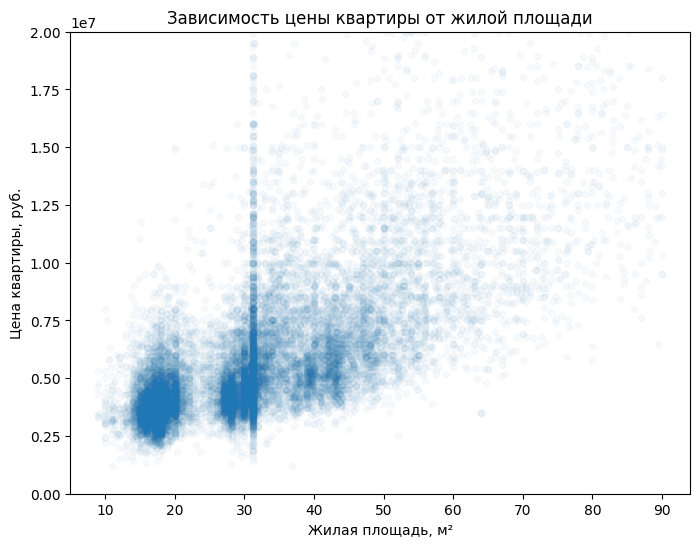

In [87]:
# построим диаграмму рассеяния
data.plot(x='living_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость цены квартиры от жилой площади')
plt.xlabel('Жилая площадь, м²')
plt.ylabel('Цена квартиры, руб.')
plt.ylim(0, 20000000)
plt.show()

На графике видно, что имеется зависимость, аналогичная уже рассмотренной выше: цена растет с увеличением жилой площади

In [88]:
# рассчитаем коэффициент корреляции
data['living_area'].corr(data['last_price'])

0.6613709580313023

Значение коэффициента подтверждает наличие зависимости (цена растет с увеличением жилой площади), но эта зависимость выражена менее сильно, чем в случае с общей площадью

**Выясним, зависит ли цена квартиры от площади кухни**

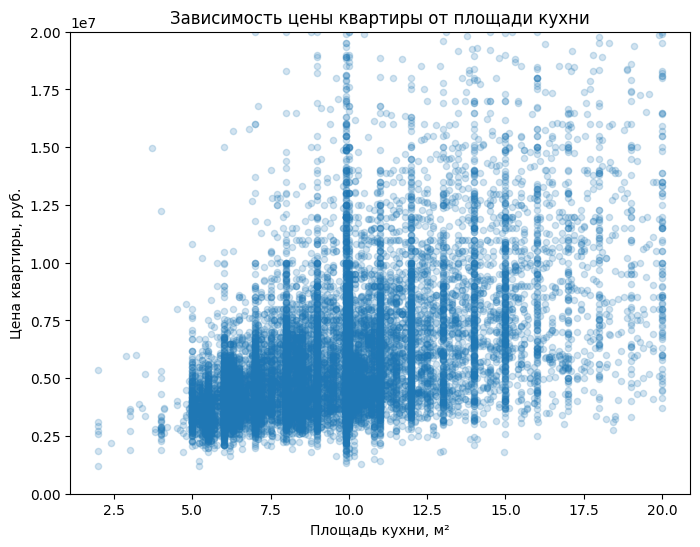

In [89]:
# построим диаграмму рассеяния
data.plot(x='kitchen_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.2)

plt.title('Зависимость цены квартиры от площади кухни')
plt.xlabel('Площадь кухни, м²')
plt.ylabel('Цена квартиры, руб.')
plt.ylim(0, 20000000)
plt.show()

Видим, что имеется зависимость, аналогичная уже рассмотренным выше (в случаях с общей площадью и жилой площадью): цена растет с увеличением площади кухни. Рисунок на графике связан с тем, что объекты с площадью кухни более 11 кв.м встречаются довольно редко

In [90]:
# рассчитаем коэффициент корреляции
data['kitchen_area'].corr(data['last_price'])

0.5176152435827865

Значение коэффициента подтверждает наличие зависимости (цена растет с увеличением площади кухни), но эта зависимость выражена менее сильно, чем в случаях с общей площадью и жилой площадью

**Выясним, зависит ли цена квартиры от количества комнат**

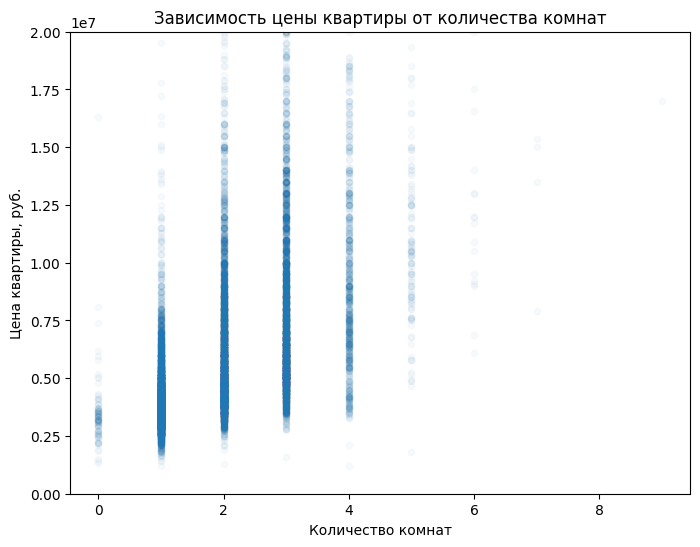

In [91]:
# построим диаграмму рассеяния
data.plot(x='rooms', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость цены квартиры от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена квартиры, руб.')
plt.ylim(0, 20000000)
plt.show()

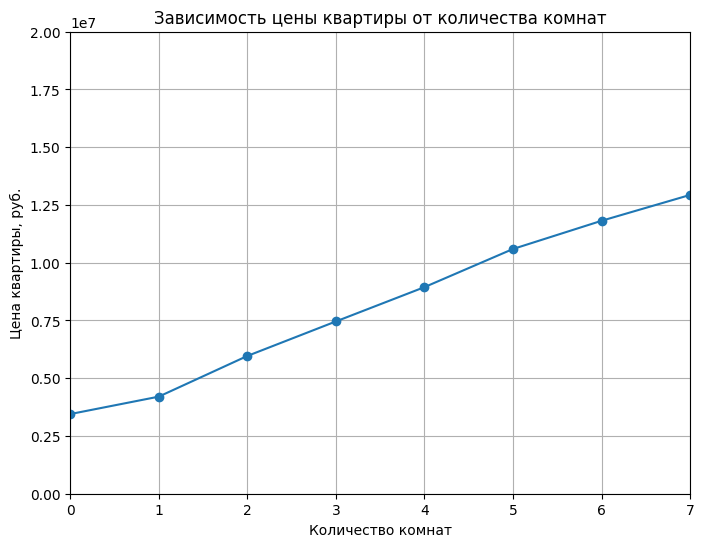

In [92]:
data.pivot_table(index='rooms', values='last_price').plot(marker='o', grid=True, figsize=(8, 6), legend=False)

plt.title('Зависимость цены квартиры от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена квартиры, руб.')
plt.ylim(0, 20000000)
plt.xlim(0, 7)
plt.show()


Видим, что для квартир с количеством комнат до 3-х включительно характерна следующая зависимость: цена растет с увеличением количества комнат. Для остальных категорий недостаточно данных для анализа (как мы выяснили ранее, при изучении данных по количеству комнат, варианты от 5 комнат и больше встречаются крайне редко)

In [93]:
# рассчитаем коэффициент корреляции
data['rooms'].corr(data['last_price'])

0.52361917876608

Значение коэффициента корреляции говорит о наличии зависимости: с увеличением количества комнат растет и цена

**Выясним, зависит ли цена квартиры от этажа, на котором расположена квартира**

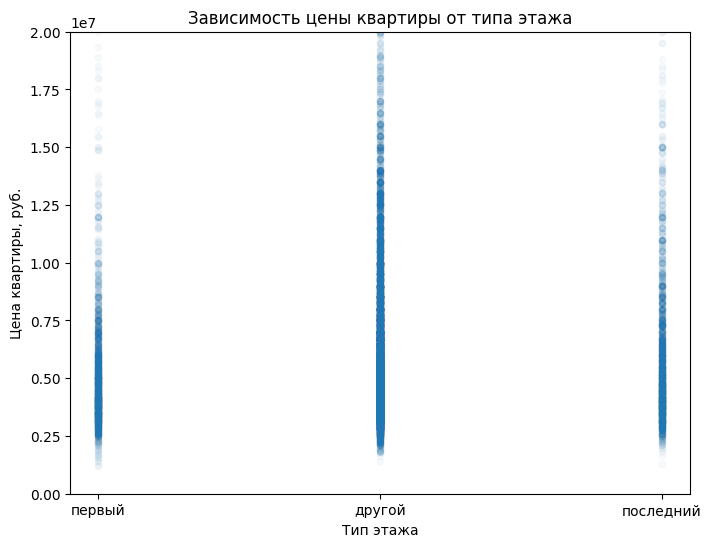

In [94]:
# построим диаграмму рассеяния
data.plot(x='floor_category', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость цены квартиры от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена квартиры, руб.')
plt.ylim(0, 20000000)
plt.show()

На графике видим, что цена квартиры зависит от типа этажа: наибольшая цена для категории "другой" (т.е. не первый и не последний). Цена объектов, расположенных на первом или последнем этажах, примерно равна между собой и существенно ниже, чем в категории "другой"

**Выясним, зависит ли цена квартиры от даты размещения публикации (день недели, месяц, год)**

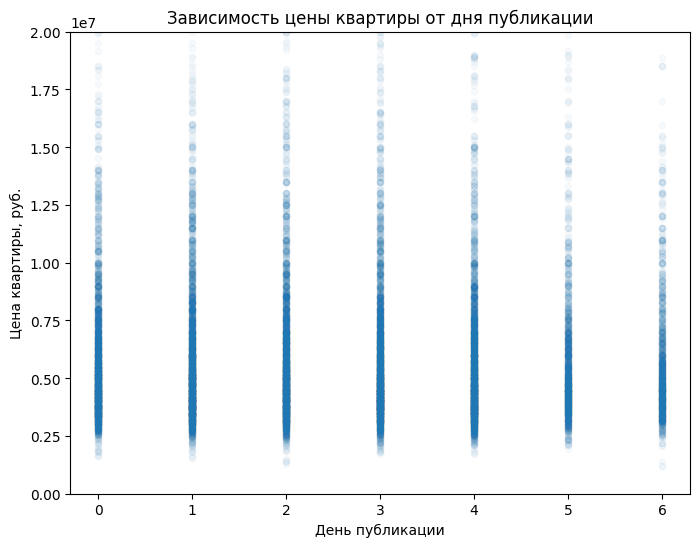

In [95]:
# построим диаграмму рассеяния
data.plot(x='exposition_weekday', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость цены квартиры от дня публикации')
plt.xlabel('День публикации')
plt.ylabel('Цена квартиры, руб.')
plt.ylim(0, 20000000)
plt.show()

In [96]:
# рассчитаем коэффициент корреляции
data['exposition_weekday'].corr(data['last_price'])

-0.010713700511077147

Зависимость между ценой квартиры и днем публикации отсутствует: мы видим это по графику и по близкому к 0 значению коэффициента корреляции

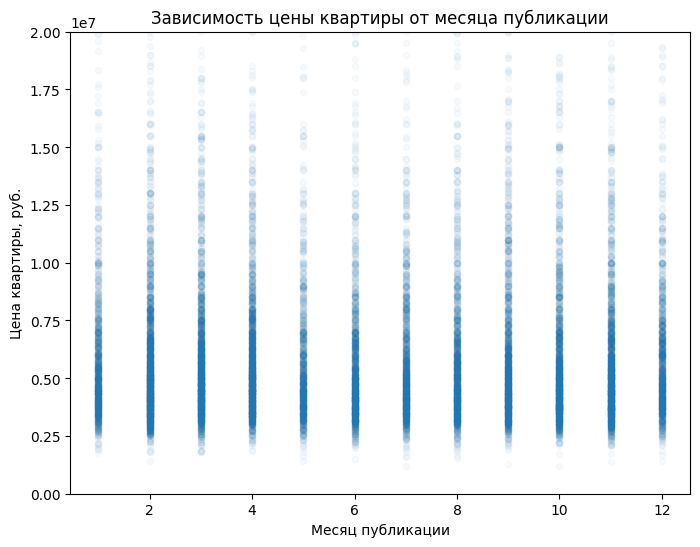

In [97]:
# построим диаграмму рассеяния
data.plot(x='exposition_month', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость цены квартиры от месяца публикации')
plt.xlabel('Месяц публикации')
plt.ylabel('Цена квартиры, руб.')
plt.ylim(0, 20000000)
plt.show()

In [98]:
# рассчитаем коэффициент корреляции
data['exposition_month'].corr(data['last_price'])

0.005100285040644064

Зависимость между ценой квартиры и месяцем публикации отсутствует: мы видим это по графику и по близкому к 0 значению коэффициента корреляции

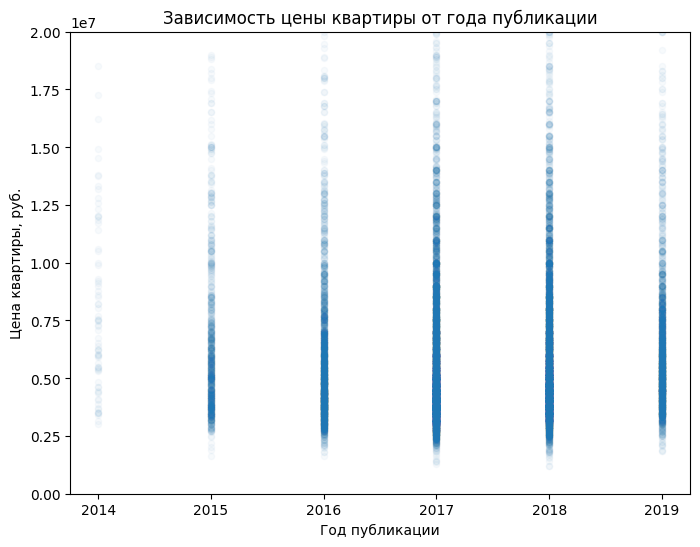

In [99]:
# построим диаграмму рассеяния
data.plot(x='exposition_year', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость цены квартиры от года публикации')
plt.xlabel('Год публикации')
plt.ylabel('Цена квартиры, руб.')
plt.ylim(0, 20000000)
plt.show()

Посмотрим ту же зависимость на линейном графике:

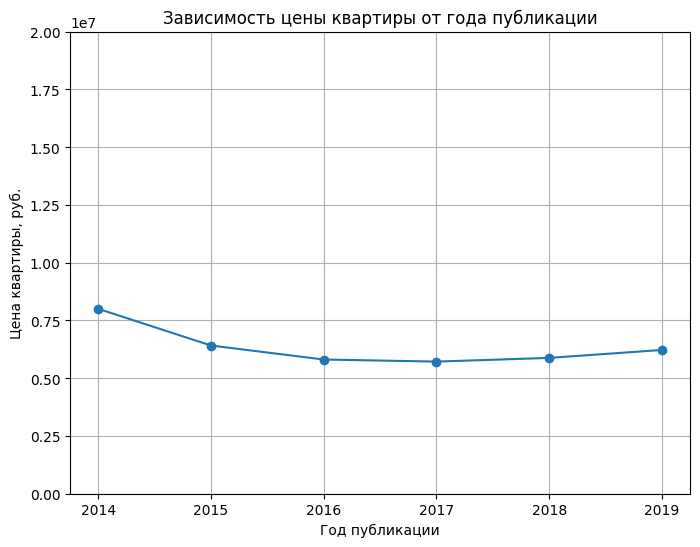

In [100]:
# строим график
data.pivot_table(index='exposition_year', values='last_price').plot(marker='o', grid=True, figsize=(8, 6), legend=False)

plt.title('Зависимость цены квартиры от года публикации')
plt.xlabel('Год публикации')
plt.ylabel('Цена квартиры, руб.')
plt.ylim(0, 20000000)
plt.show()

In [101]:
# рассчитаем коэффициент корреляции
data['exposition_year'].corr(data['last_price'])

0.0016403138213152548

Зависимость между ценой квартиры и годом публикации отсутствует: мы видим это по графику и по близкому к 0 значению коэффициента корреляции

**Таким образом, в ходе исследования мы установили как различные факторы влияют на цену объекта недвижимости:**
- цена объекта недвижимости растет с увеличением общей площади
- цена объекта недвижимости растет с увеличением жилой площади
- цена объекта недвижимости растет с увеличением площади кухни
- цена объекта недвижимости зависит от количества комнат: для квартир с количеством комнат до 3-х включительно цена растет с увеличением количества комнат
- цена объекта недвижимости зависит от типа этажа: наибольшая цена для категории "другой" (т.е. не первый и не последний). Цена объектов, расположенных на первом или последнем этажах, примерно равна между собой и существенно ниже, чем в категории "другой"
- цена объекта недвижимости не зависит от даты публикации объявления о его продаже (дня, месяца или года)

**Посчитаем среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений**

In [102]:
# объявим переменную, содержащую данные о 10 населенных пунктах с наибольшим числом объявлений
max_exp_localities = data['locality_name'].value_counts().head(10)
max_exp_localities

locality_name
Санкт-Петербург    14240
Шушары               436
Пушкин               338
Колпино              332
Парголово            324
Петергоф             197
КрасноеСело          173
Сестрорецк           170
Ломоносов            132
Кронштадт             92
Name: count, dtype: int64

In [103]:
# выведем среднюю цену за квадратный метр по 10 указанным выше населенным пунктам
max_exp_localities_sqm = data.query('locality_name in @max_exp_localities.index').pivot_table(index='locality_name', \
values='price_one_square_meter')
max_exp_localities_sqm.sort_values(by='price_one_square_meter', ascending=False)

,price_one_square_meter
locality_name,
Санкт-Петербург,108132.866940
Сестрорецк,101523.391412
Пушкин,101006.045414
Парголово,90169.310957
Петергоф,84502.422741
Кронштадт,79423.693152
Шушары,78681.573807
Колпино,75369.957801
Ломоносов,72763.087576


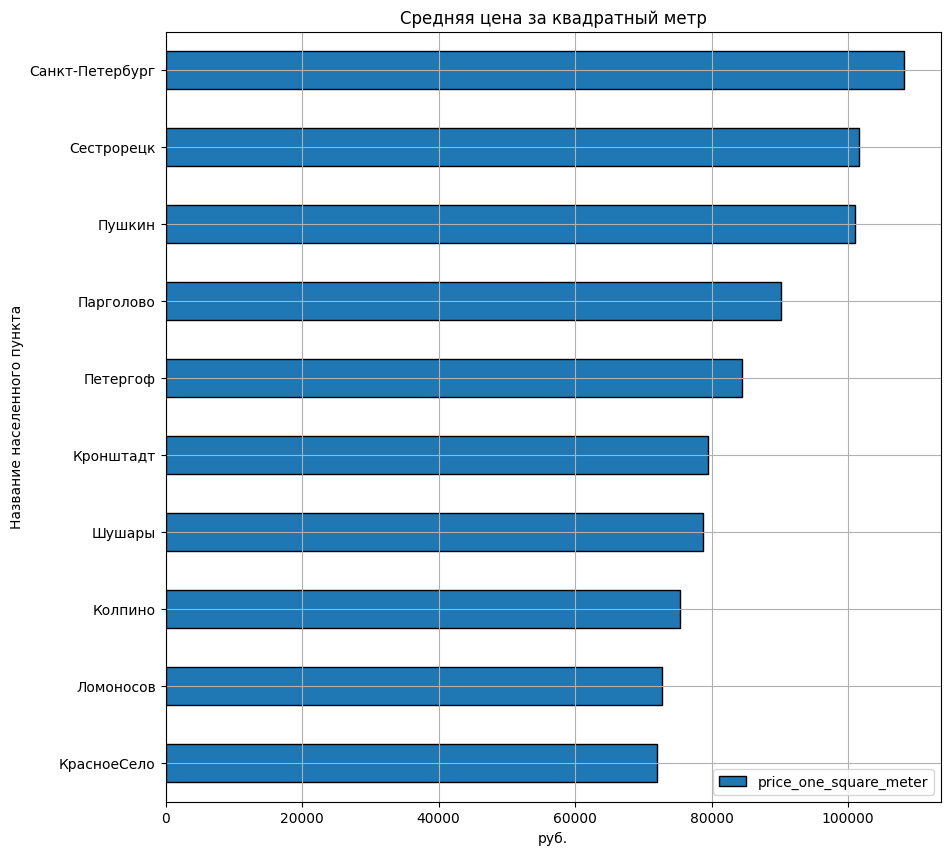

In [104]:
# отобразим на графике среднюю цену квадратного метра
max_exp_localities_sqm.sort_values(by='price_one_square_meter').plot(kind='barh', legend=True, grid=True, \
ec='black', figsize=(10, 10))

plt.title('Средняя цена за квадратный метр')
plt.xlabel('руб.')
plt.ylabel('Название населенного пункта')
plt.show()

Таким образом, самая высокая цена квадратного метра в Санкт-Петербурге - 108,1 тыс. руб. за квадратный метр (что вполне ожидаемо). Далее следуют Сестрорецк (101,5 тыс. руб.) и Пушкин (101,0 тыс. руб.)

Самая низкая стоимость квадратного метра в Красном Селе - 72,1 тыс. руб. В тройку населенных пунктов с самой низкой ценой за квадратный метр входят также Колпино (75,4 тыс. руб.) и Ломоносов (72,8 тыс. руб.)

**Выясним как стоимость объектов в Санкт-Петербурге зависит от расстояния до центра города**

In [105]:
# выберем данные только по Санкт-Петербургу
data_spb = data.query('locality_name == "Санкт-Петербург"')

In [106]:
# проверим результат - выведем на экран 10 строк
data_spb.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
1,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,90.0,2.0,574.0,558,92785.71,3,8,2015,другой,14.0
3,5,7915000.0,71.6,2019-04-18,2,2.70,24,31.3,22,False,...,460.0,0.0,503.0,95,110544.69,3,4,2019,другой,12.0
4,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,460.0,0.0,503.0,289,88524.59,6,2,2017,другой,15.0
5,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,310.0,2.0,553.0,137,127525.25,3,11,2017,другой,14.0
9,16,4650000.0,39.0,2017-11-18,1,2.70,14,20.5,5,False,...,590.0,1.0,296.0,19,119230.77,5,11,2017,другой,14.0
10,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,False,...,420.0,0.0,503.0,397,81707.32,3,11,2017,первый,11.0
11,6,4180000.0,36.0,2016-09-09,1,2.70,17,16.5,7,False,...,460.0,1.0,859.0,571,116111.11,4,9,2016,другой,15.0
12,8,3250000.0,31.0,2017-01-27,1,2.50,5,19.4,2,False,...,759.0,0.0,503.0,168,104838.71,4,1,2017,другой,11.0
13,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.0,8,False,...,460.0,0.0,503.0,97,117355.37,2,1,2019,другой,13.0
15,13,3200000.0,31.6,2018-03-14,1,2.70,5,16.9,2,False,...,248.0,0.0,503.0,310,101265.82,2,3,2018,другой,10.0


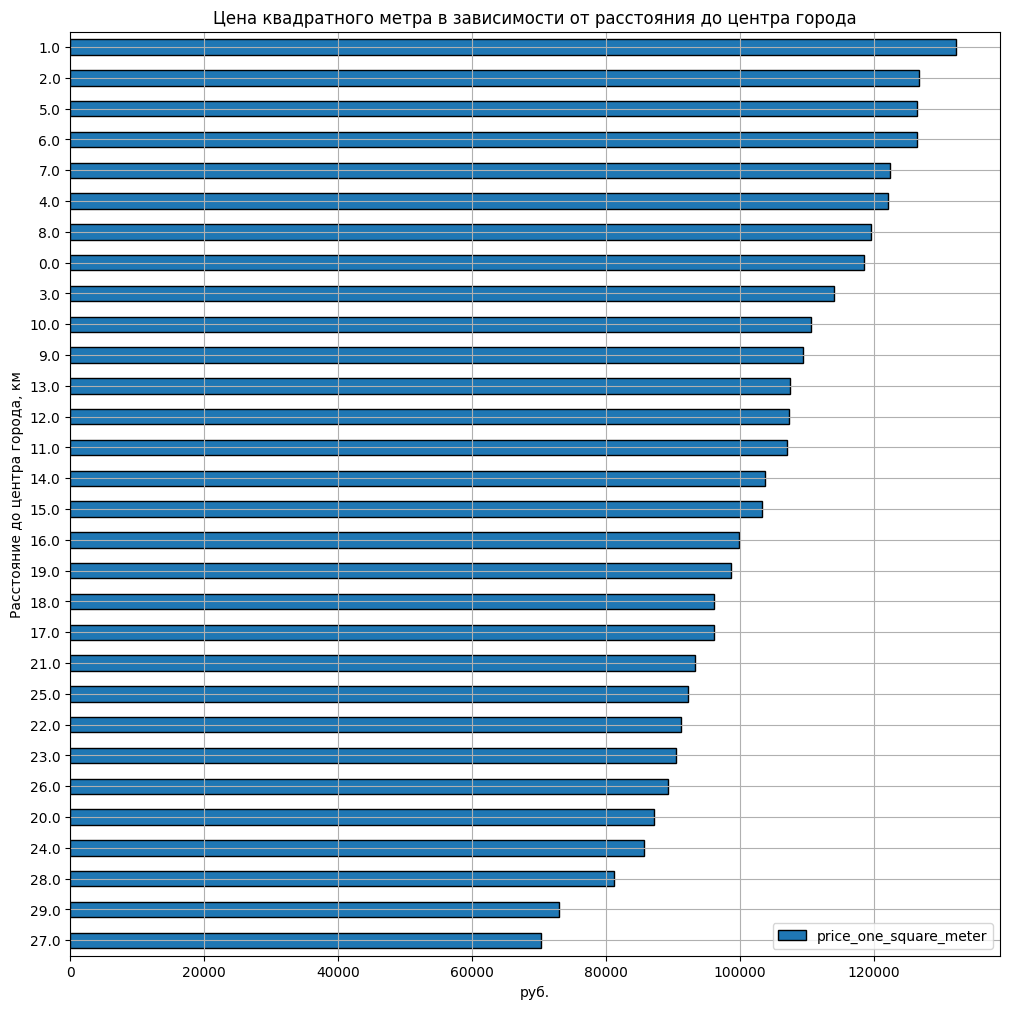

In [107]:
# отобразим на графике как расстояние до центра города влияет на стоимость квадратного метра
data_spb.pivot_table(index='city_centers_nearest_km', values='price_one_square_meter').sort_values\
(by='price_one_square_meter').plot(kind='barh', legend=True, grid=True, ec='black', figsize=(12, 12))

plt.title('Цена квадратного метра в зависимости от расстояния до центра города')
plt.xlabel('руб.')
plt.ylabel('Расстояние до центра города, км')
plt.show()

Приведенная на графике информация достаточно наглядна. Мы видим, что наибольшую цену (135 тыс. руб.) имеют объекты недвижимости, расположенные на расстоянии не более 1 км от центра города. По мере удаления объекта от центра стоимость квадратного метра уменьшается: так, при расстоянии до центра 10 км стоимость квадратного метра составит уже 110 тыс. руб., а при расстоянии 27 км - 70 тыс. руб. (т.е. почти в два раза меньше, чем стоимость квадратного метра объекта, расположенного на расстоянии не более 1 км от центра  

### Общий вывод

Для проведения настоящего исследования были использованы данные сервиса Яндекс.Недвижимость - архив объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктов за несколько лет (файл /datasets/real_estate_data.csv).

При этом выявлены следующие **недостатки, связанные с качеством представленных данных:**

1. в 14 столбцах из 22 (т.е. в 64% ) имелись пропуски данных 
2. в данных присутствовали серьезные аномалии и выбросы, в т.ч.:
- в столбце ceiling_height (высота потолков) минимальное значение составляло 1 м, а максимальное - 100 м
- минимальное значение airports_nearest (расстояние до ближайшего аэропорта в метрах) было равно 0 (т.е. получается, что квартира     находится на территории аэропорта)
- максимальное количество этажей (floors_total) было равно 60, что для представленного региона является ошибкой
- минимальная цена квартиры (last_price) была 12 190 руб., что маловероятно
- минимальная жилая площадь квартиры (living_area) была 2 кв. м, что маловероятно
- минимальная площадь кухни (kitchen_area ) была 1,3 кв. м, что маловероятно
3. в столбцах использованы некорректные типы данных:
- для столбца first_day_exposition, в котором хранится информация о дате публикации, был использован строковый тип вместо значений даты и времени
-  для столбца  is_apartment, в котором  хранится информация о том, является ли помещение апартаментами, был использован строковый тип вместо логического
4. имелись неявные дубликатыв столбце с названиями населенных пунктов (locality_name):
- в названиях  населенных пунктов использовалось 2 варианта написания одного и того же слова: "поселок" и  "посёлок", что приводило к дублям в данных
- при упоминании деревень Калитино, Павлово, Фёдоровское, Щеглово и одноименных поселков речь шла об одних и тех же населенных пунктах (что нетрудно проверить по карте и справочникам)
- деревня Никольское и Никольское идентичны (речь идет о Никольском городском поселении в Тосненском районе Ленинградской области)
- деревня Кудрово и Кудрово идентичны (статус города получен в 2018 году)
- также идентичны Мурино и поселок Мурино, Любань и поселок Любань

Наличие указанных недостатков может быть связано как с небрежным заполнением информации пользователем (возможно, некоторые поля пользователь не считает важными для заполнения либо не знает чем их заполнить. В связи с этим рекомендуем:

- разработать подробную, наглядную и читабельную инструкцию по заполнению полей для пользователей сервиса
- исключить использование буквы «ё» при заполнении информации
- проверять корректность данных при выгрузке

Указанные меры будут способствовать существенному сокращению времени исследования и, соответственно, времени предоставления вам его результатов

В ходе предобработки данных была проведена обработка аномальных значений и выбросов, заменены типы данных для столбцов, обработаны неявные дубликаты

Для дальнейшего исследования мы добавили в таблицу столбцы со следующими параметрами:
- цена одного квадратного метра
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние до центра города в километрах

**В ходе исследования выявлены следующие закономерности:**

1. «портрет» типичного объявления, размещенного на сервисе Яндекс Недвижимость выглядит следующим образом: это опубликованное в будний день (чаще вторник или четверг) с февраля по апрель включительно объявление о продаже квартиры, имеющей следующие параметры:
- двухкомнатная либо трехкомнатная квартира
- с общей площадью в диапазоне от 30 до 65 кв.м
- жилой площадью 20 кв.м либо 30 кв.м
- площадью кухни 10 кв.м
- с высотой потолков 2,5 м или 2,7 м
- расположенная на 5-м этаже шести или десятиэтажного дома
- на расстоянии от 11 до 16 км от центра города
- на расстоянии 500 м от парка и от 15 до 25 км до ближайшего аэропорта
- с ценой в диапазоне от 3 500 000 руб. до 4 500 000 руб.

2. факторы, влияющие на цену объекта недвижимости:
- цена объекта недвижимости растет с увеличением общей площади
- цена объекта недвижимости растет с увеличением жилой площади
- цена объекта недвижимости растет с увеличением площади кухни
- цена объекта недвижимости зависит от количества комнат: для квартир с количеством комнат до 3-х включительно цена растет с увеличением количества комнат
- цена объекта недвижимости зависит от типа этажа: наибольшая цена для категории "другой" (т.е. не первый и не последний). Цена объектов, расположенных на первом или последнем этажах, примерно равна между собой и существенно ниже, чем в категории "другой"
- цена объекта недвижимости не зависит от даты публикации объявления о его продаже (дня, месяца или года)

3. установлено, что самая высокая цена квадратного метра в Санкт-Петербурге - 108,1 тыс. руб. за квадратный метр (что вполне ожидаемо). Далее следуют Сестрорецк (101,5 тыс. руб.) и Пушкин (101,0 тыс. руб.)

4. установлено, что самая низкая стоимость квадратного метра в Красном Селе - 72,1 тыс. руб. В тройку населенных пунктов с самой низкой ценой за квадратный метр входят также Колпино (75,4 тыс. руб.) и Ломоносов (72,8 тыс. руб.)

5. при анализе расположенных в Санкт-Петербурге объектов недвижимости выявлена следующая закономерность: наибольшую цену (135 тыс. руб.) имеют объекты недвижимости, расположенные на расстоянии не более 1 км от центра города. По мере удаления объекта от центра стоимость квадратного метра уменьшается: так, при расстоянии до центра 10 км стоимость квадратного метра составит уже 110 тыс. руб., а при расстоянии 27 км - 70 тыс. руб. (т.е. почти в два раза меньше, чем стоимость квадратного метра объекта, расположенного на расстоянии не более 1 км от центра
